# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **12.10.2022**

Мягкий дедлайн: **1.11.22 23:59** (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: **8.11.22 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: 10.5

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

$\nabla_w MSE(w, X, y) = \frac{2}{l} X^T(Xw-y)$

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

![](adam_meme.png)

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение 

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [3]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [4]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'
    print(descent_name, 'ok')
print('TESTS PASSED')

full ok
stochastic ok
momentum ok
adam ok
TESTS PASSED


In [5]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'
print('TESTS PASSED')

Stopped by max iter on step 10
TESTS PASSED


Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/41257/enter/).

Ник: dashagarov@edu.hse.ru
Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**: https://contest.yandex.ru/contest/41257/run-report/72451482/


* **StochasticDescent**: https://contest.yandex.ru/contest/41257/run-report/72451776/


* **MomentumDescent**: https://contest.yandex.ru/contest/41257/run-report/72452059/


* **Adam**: https://contest.yandex.ru/contest/41257/run-report/72466475/


* **LinearRegression**: https://contest.yandex.ru/contest/41257/run-report/72467085/

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте, какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте, какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [9]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 12
plt.rcParams['savefig.format'] = 'pdf'
sns.set_style('darkgrid')

In [10]:
data = pd.read_csv('autos.csv')

In [11]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

In [12]:
data.dtypes

brand                object
model                object
vehicleType          object
gearbox              object
fuelType             object
notRepairedDamage    object
powerPS               int64
kilometer             int64
autoAgeMonths         int64
price                 int64
dtype: object

In [13]:
categorical = list(data.columns[data.dtypes == 'object'])
numeric = data.columns[data.dtypes != 'object']
numeric = list(numeric.drop('price'))
other = []

categorical, numeric

(['brand', 'model', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage'],
 ['powerPS', 'kilometer', 'autoAgeMonths'])

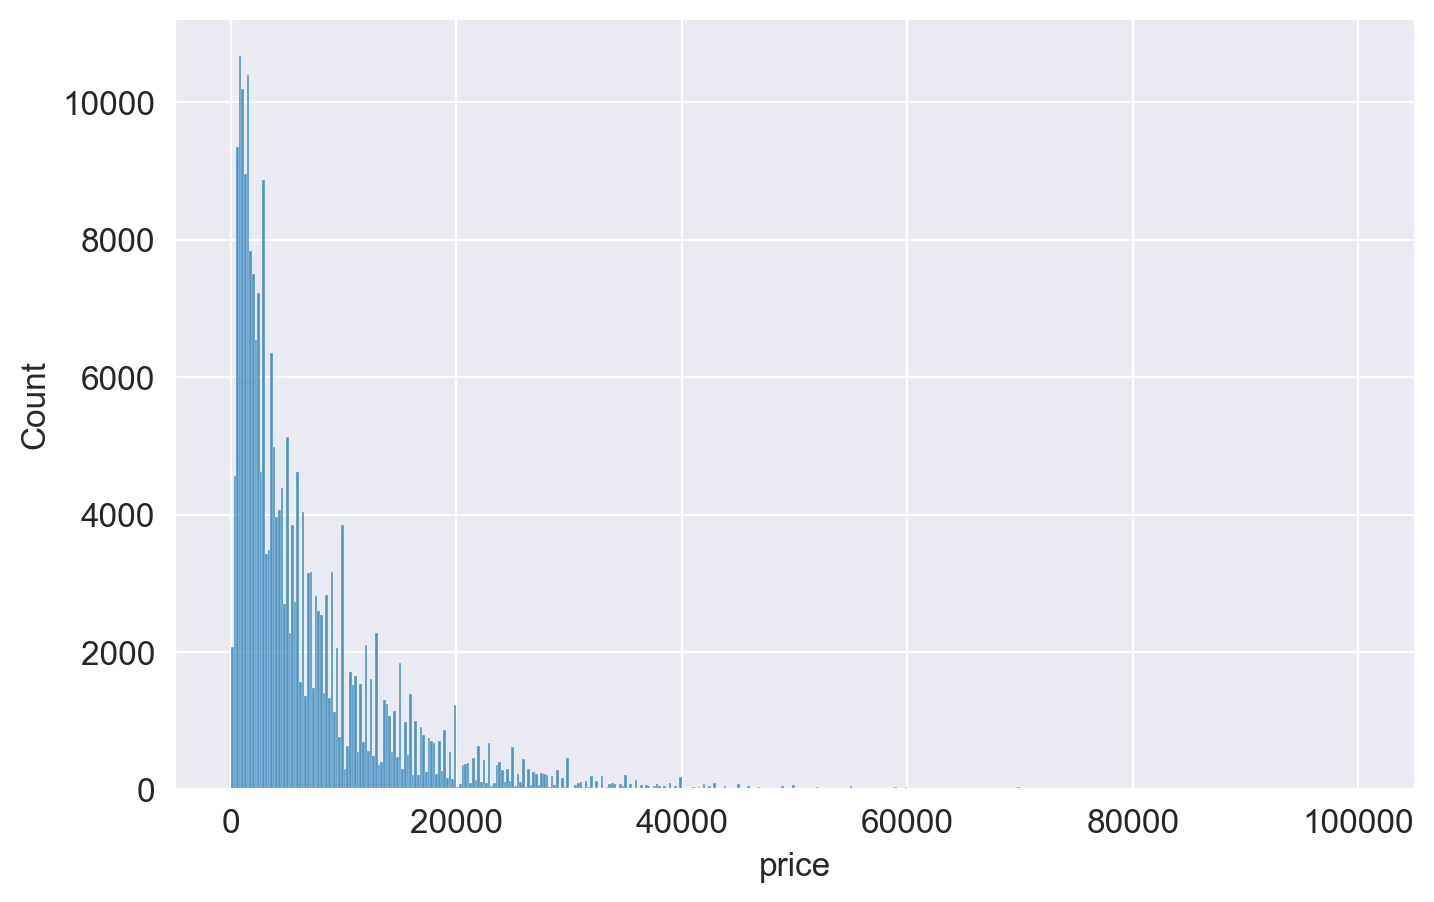

In [14]:
sns.histplot(data['price'])
plt.show()

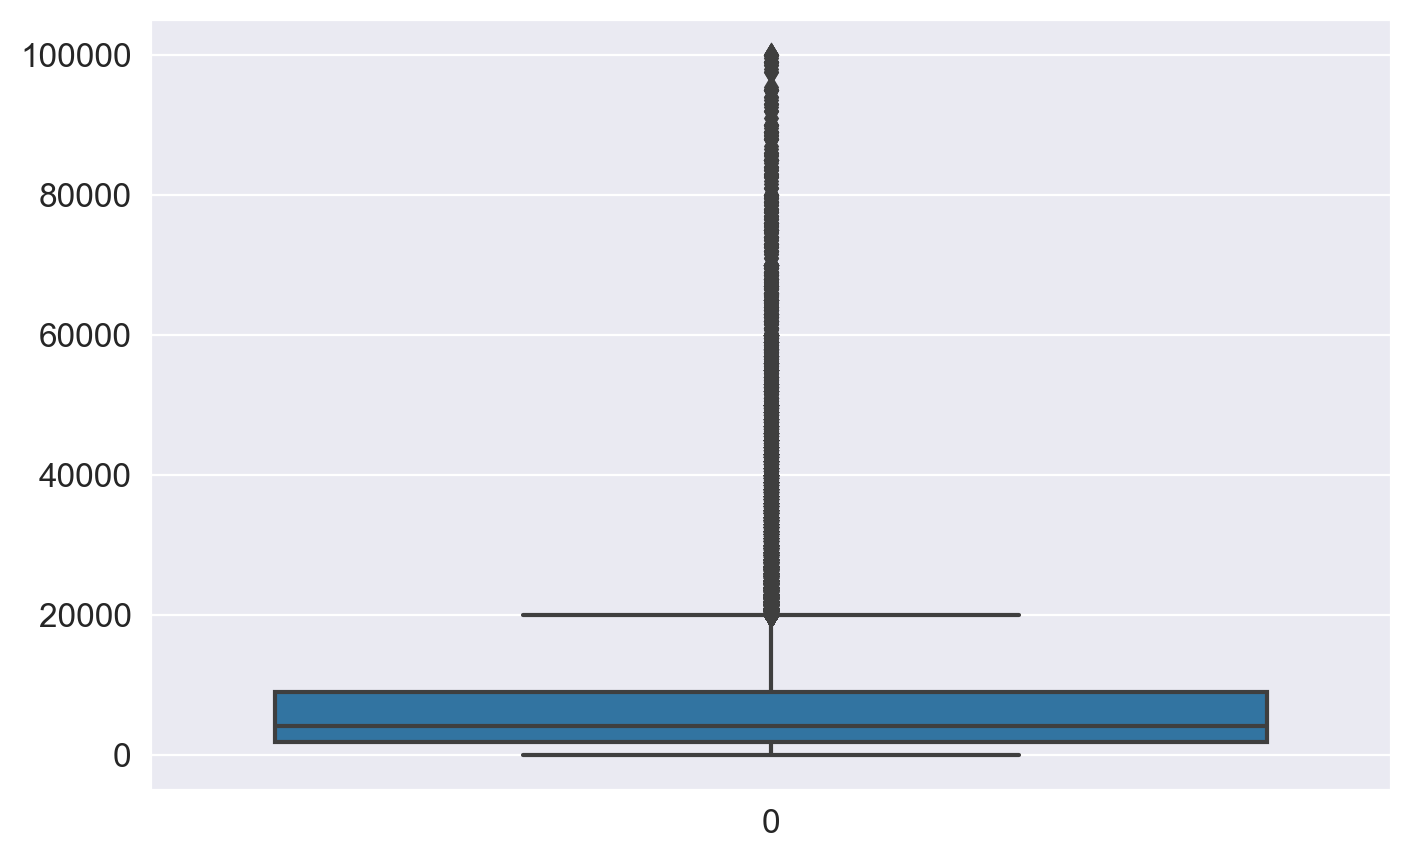

In [15]:
sns.boxplot(data['price'])
plt.show()

Уберем данные выше 99-квантили

In [16]:
data = data[data['price'] <= data['price'].quantile(0.99)]

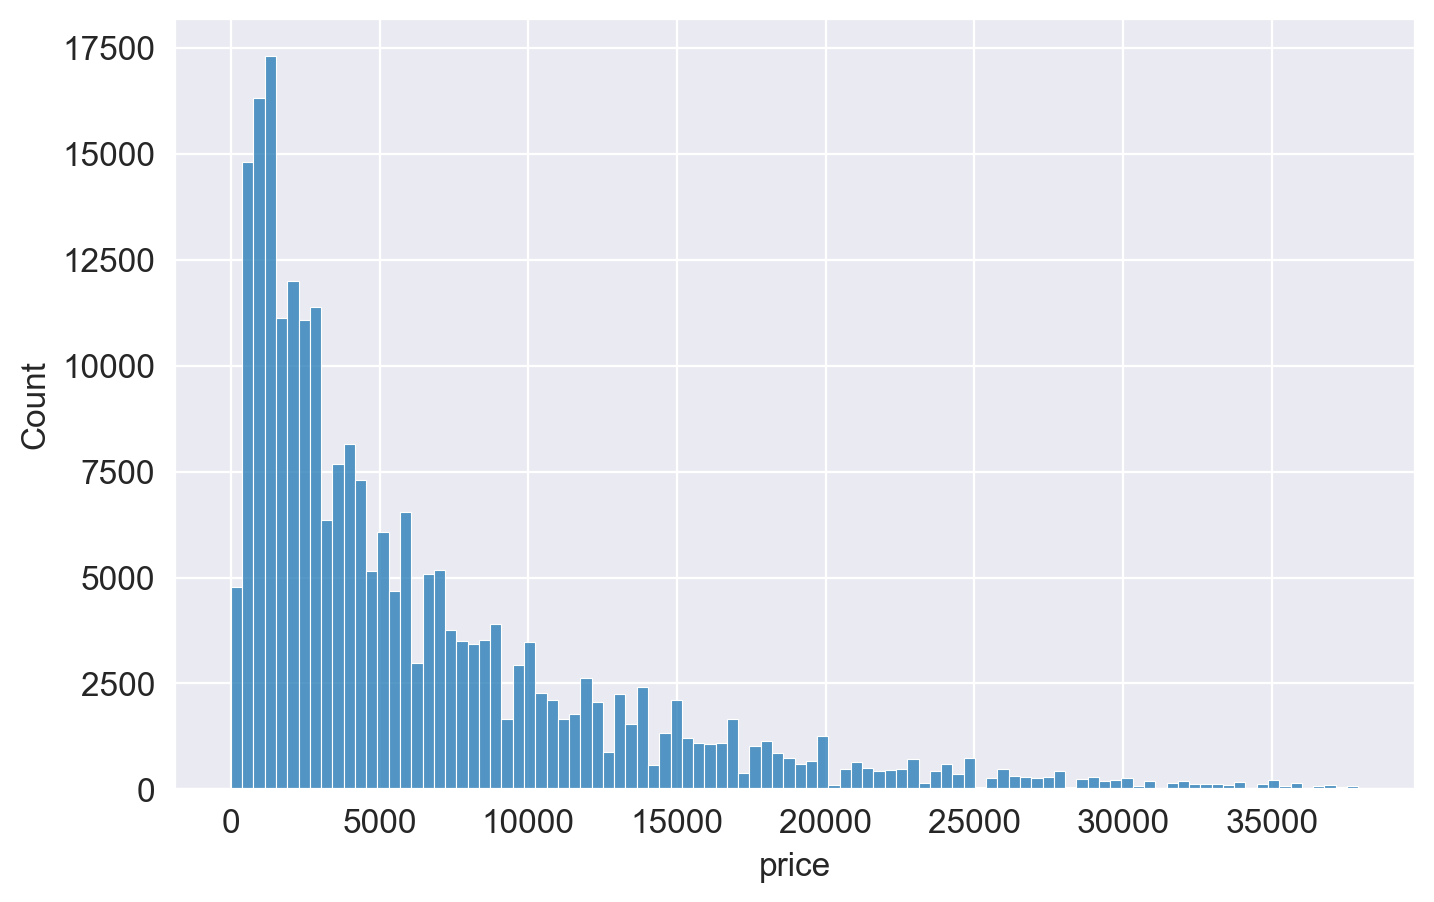

In [17]:
sns.histplot(data['price'], bins=100)
plt.show()

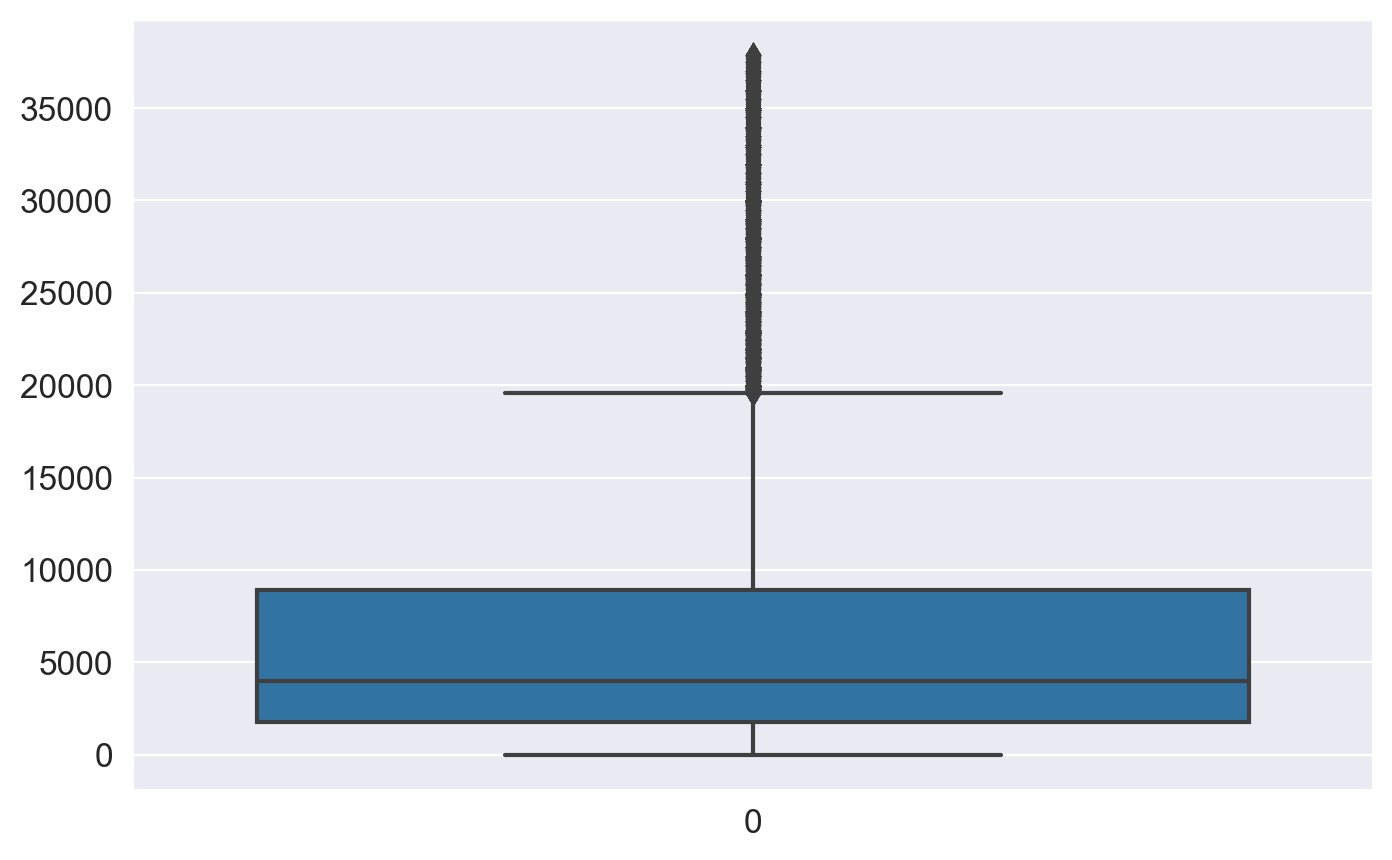

In [18]:
sns.boxplot(data['price'])
plt.show()

Стало получше. Видно, что распределение похоже на логнормальное

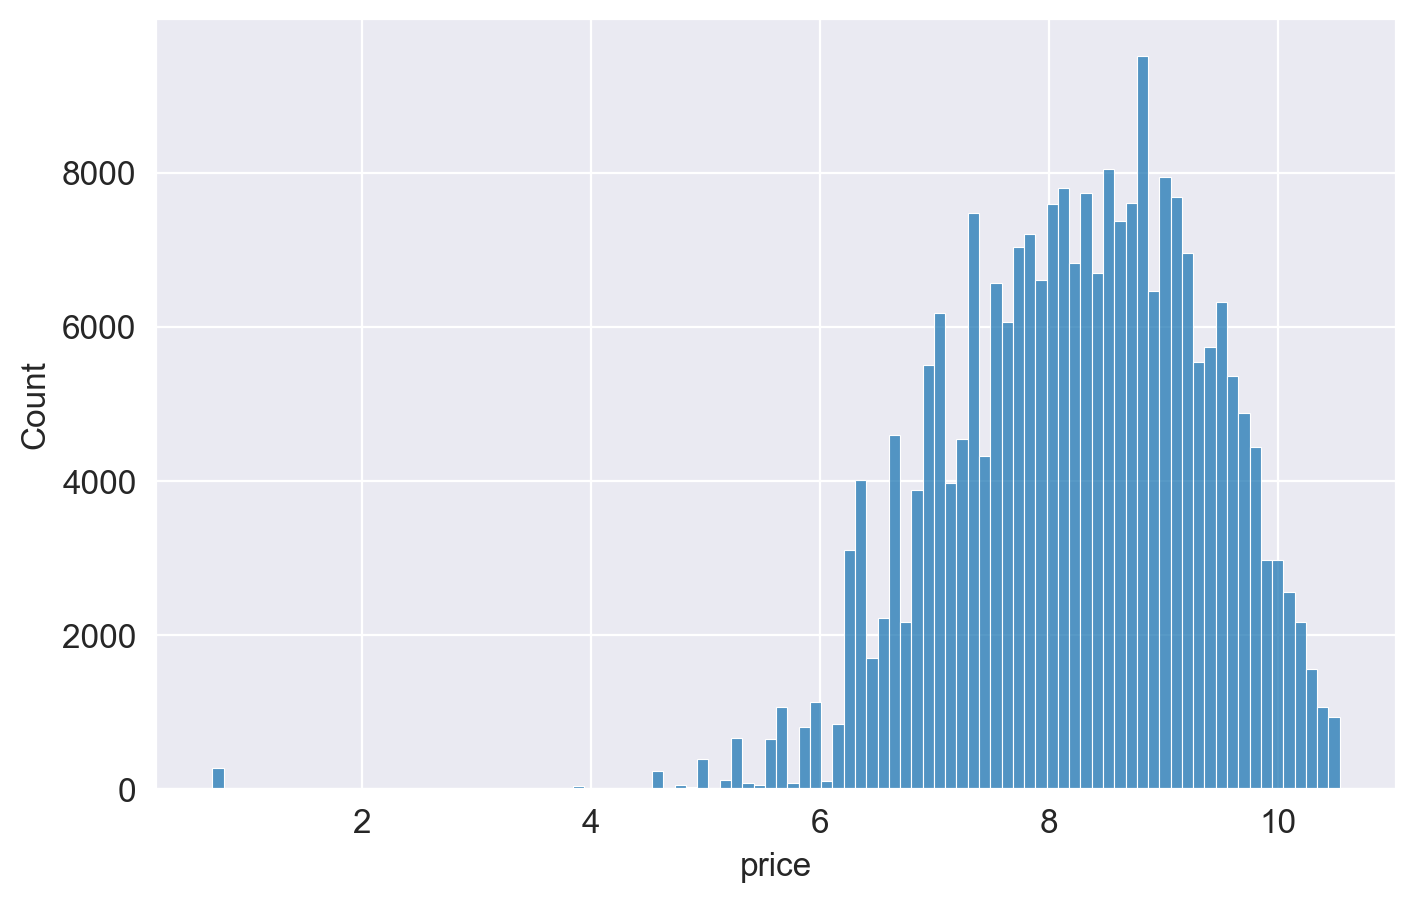

In [19]:
sns.histplot(np.log1p(data['price']), bins=100)
plt.show()

Кажется, что-то +- похожее на нормальное получилось. Можно пробовать предсказывать логарифм таргета

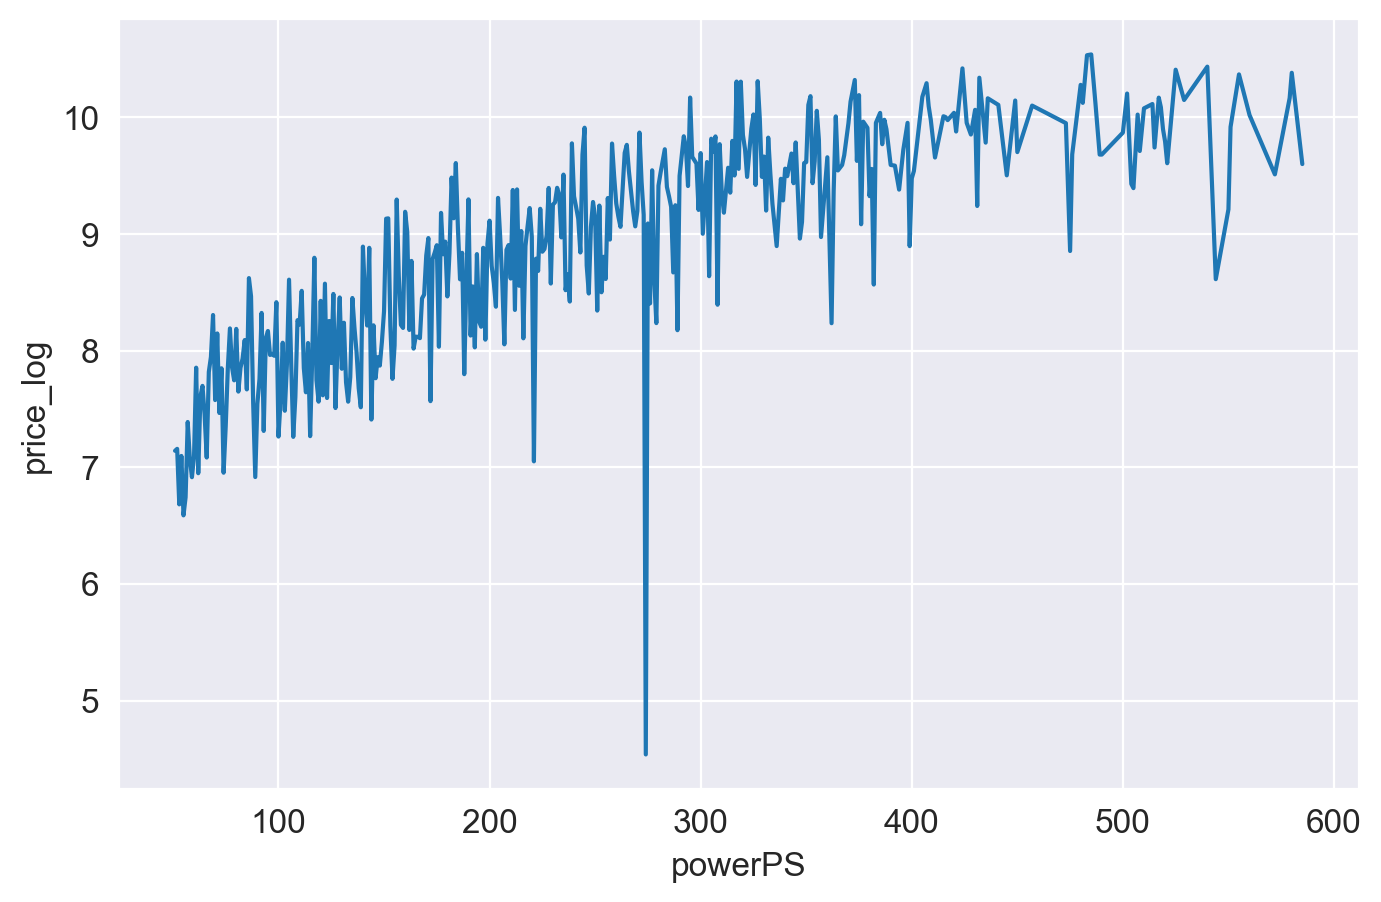

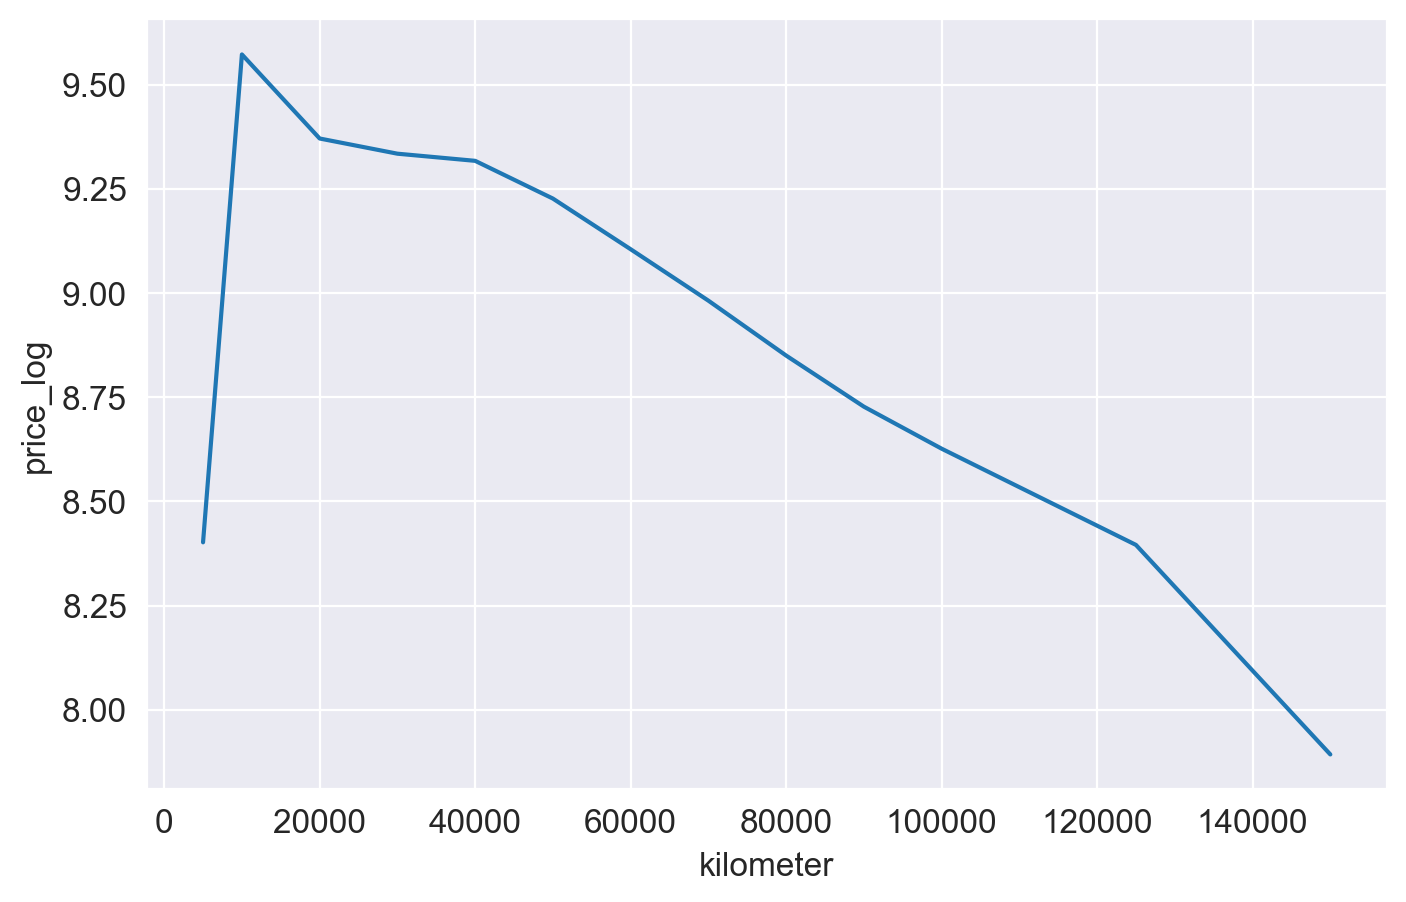

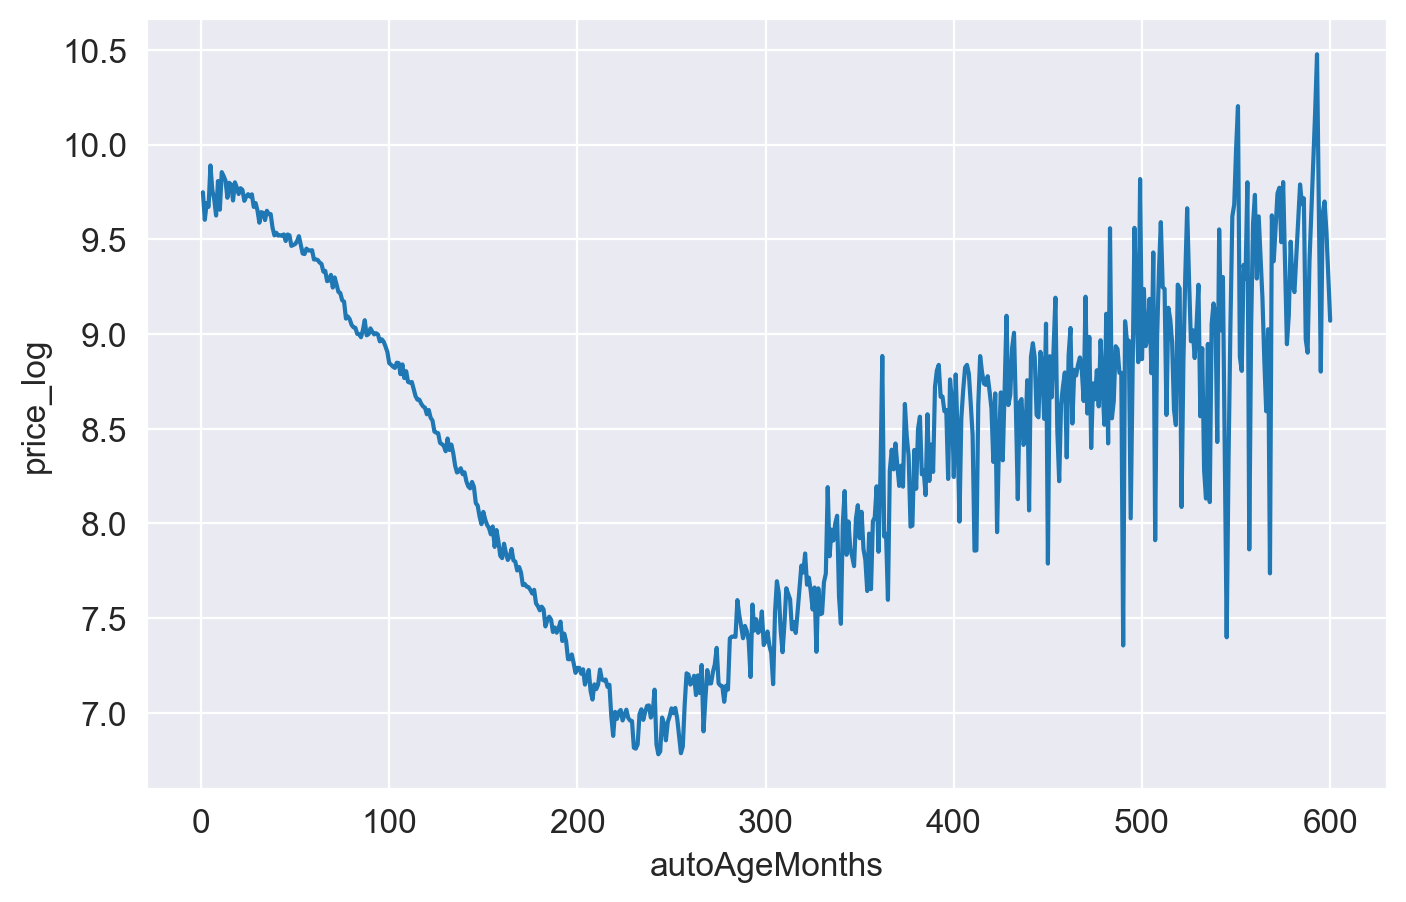

In [20]:
data['price_log'] = np.log1p(data['price'])

for feature in numeric:
    sns.lineplot(data=data, x=feature, y='price_log', err_style=None)
    plt.show()

Добавим квадрат autoAgeMonths и признак что пробег меньше 15к


In [21]:
data['autoAgeMonthsSqr'] = data['autoAgeMonths'] ** 2
numeric.append('autoAgeMonthsSqr')
data['low_kilometers'] = data['kilometer'] < 15_000
categorical.append('low_kilometers')
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price,price_log,autoAgeMonthsSqr,low_kilometers
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500,7.313887,31329,False
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600,8.188967,8649,False
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650,6.478510,60516,False
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200,7.696667,19600,False
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000,7.601402,18496,False


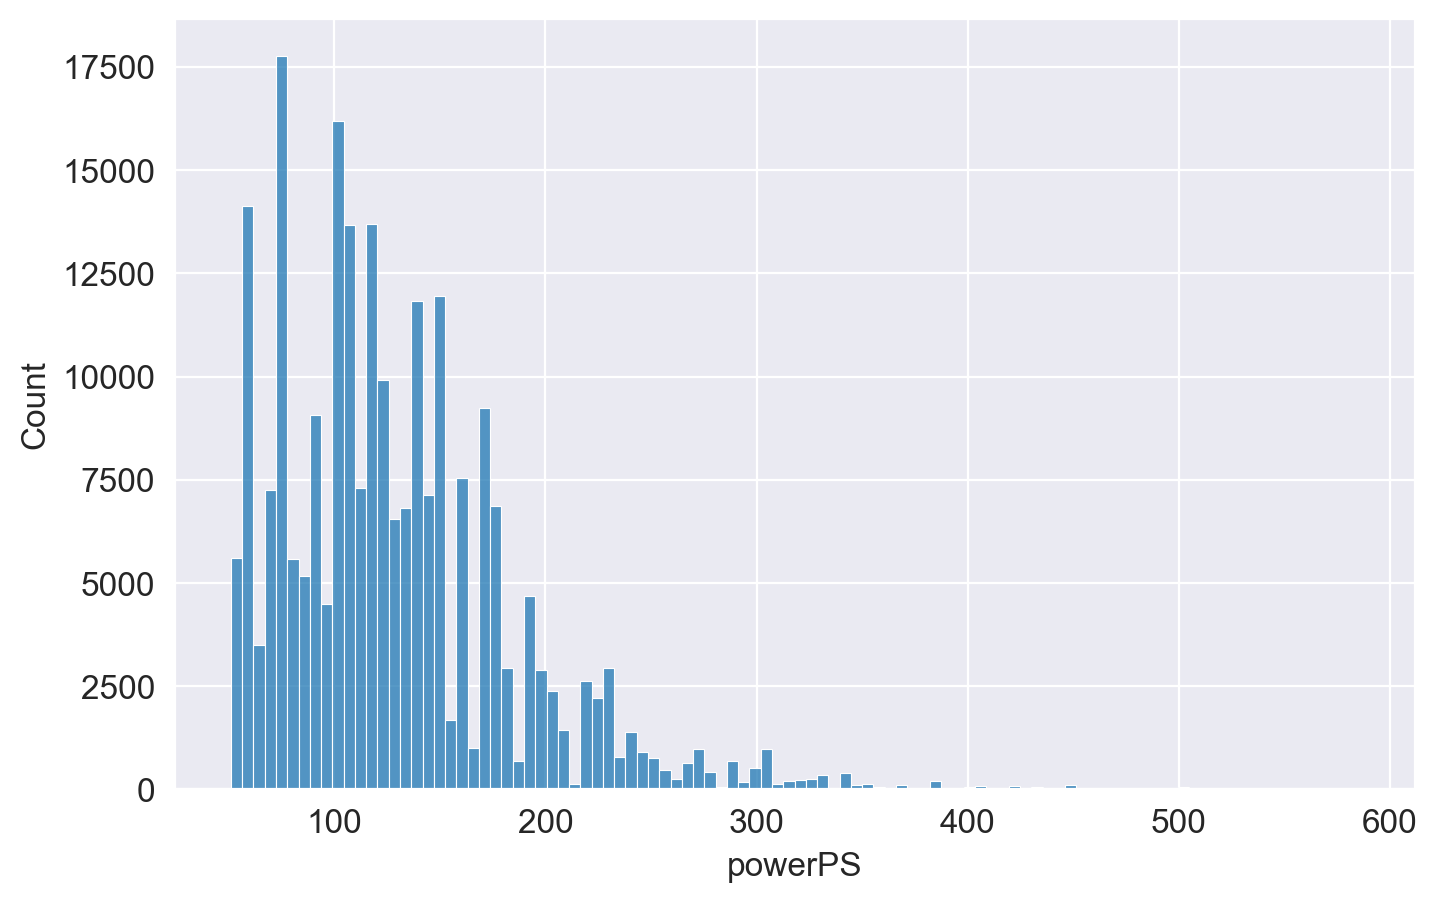

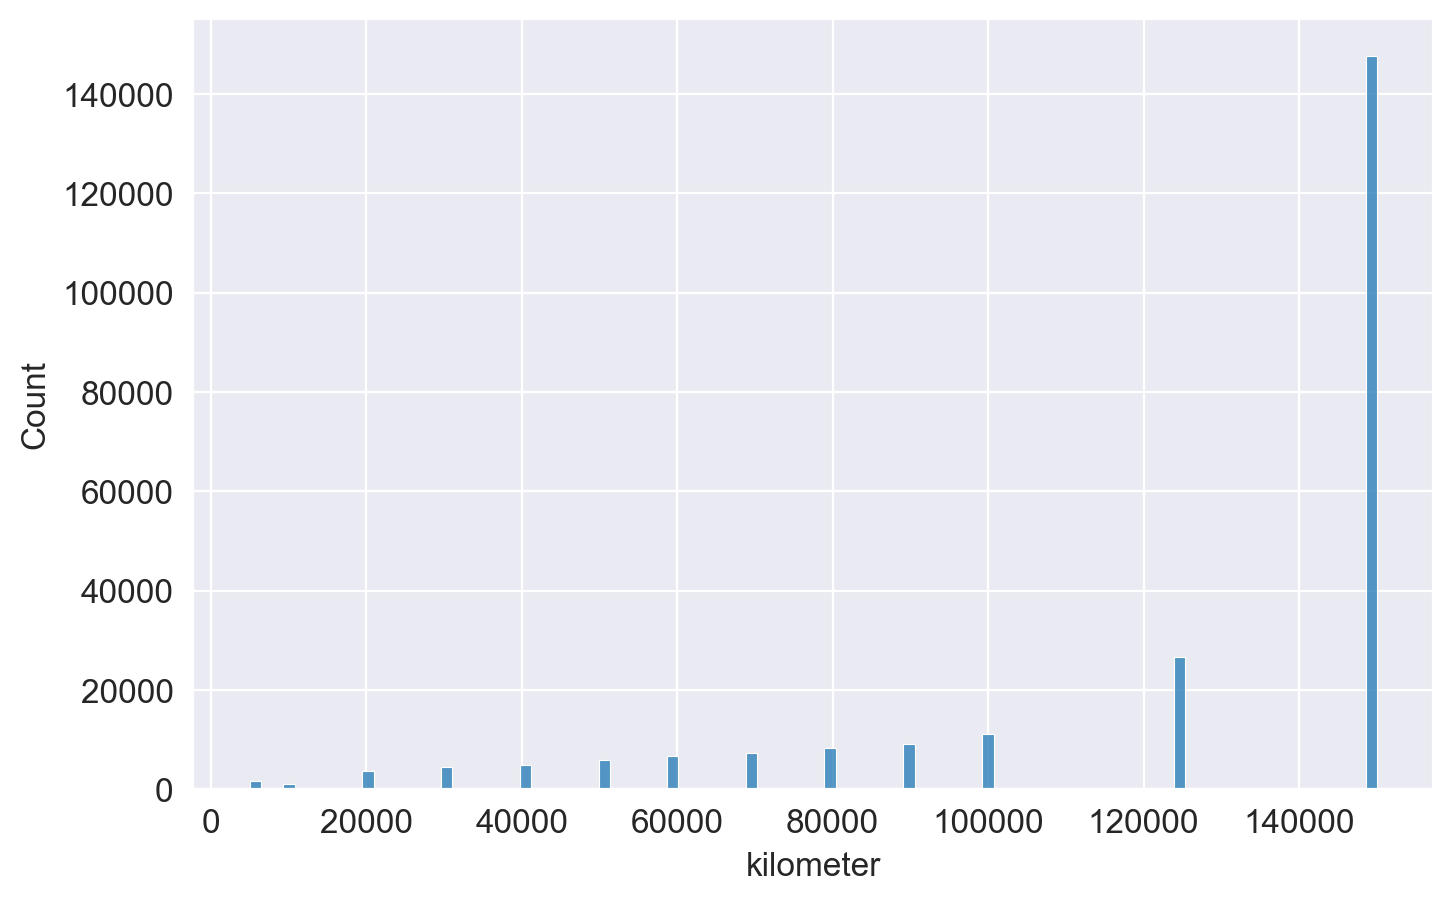

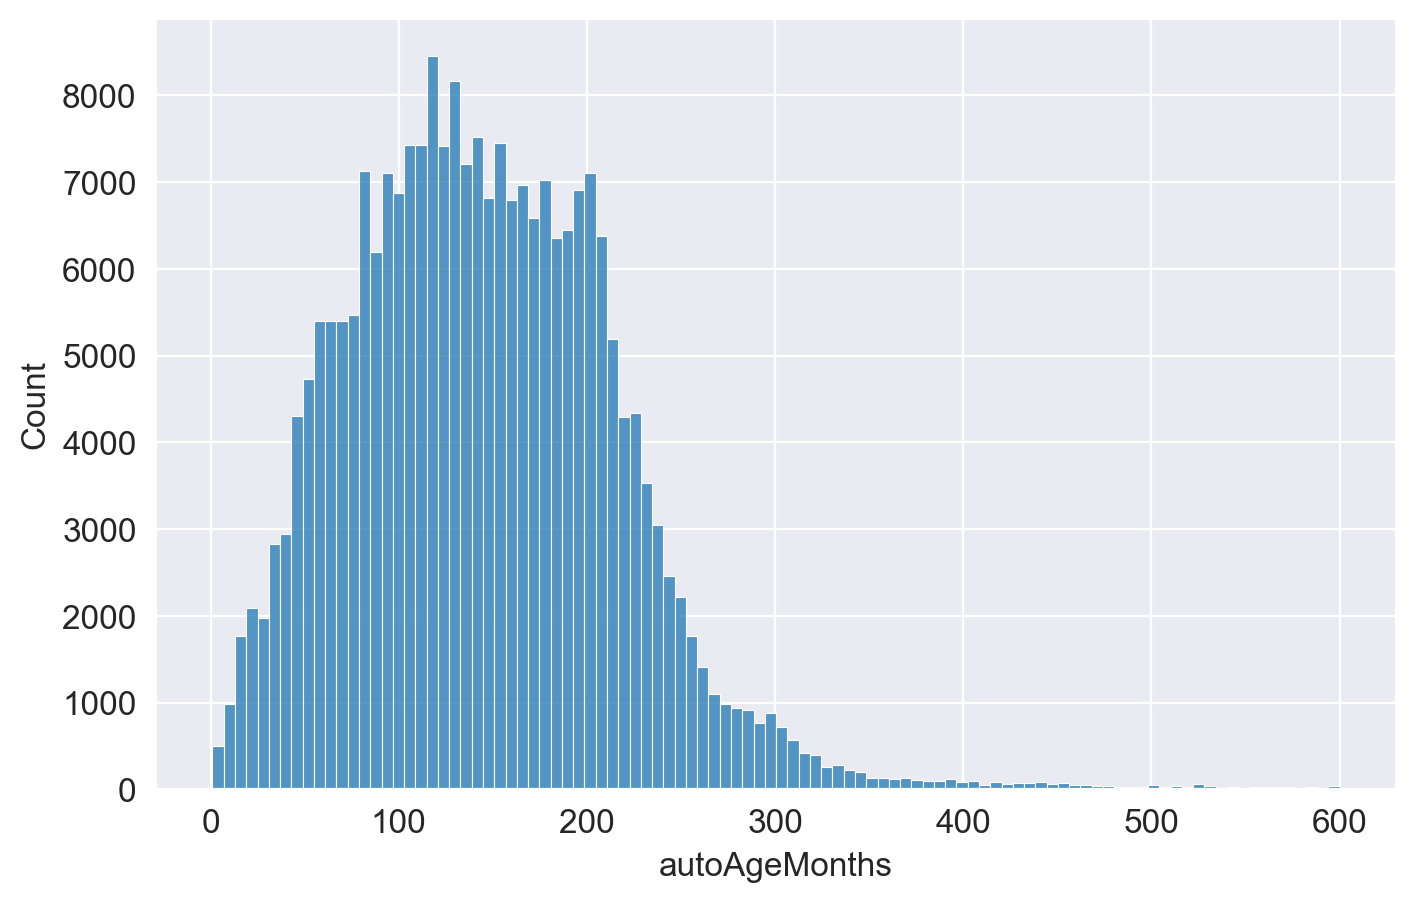

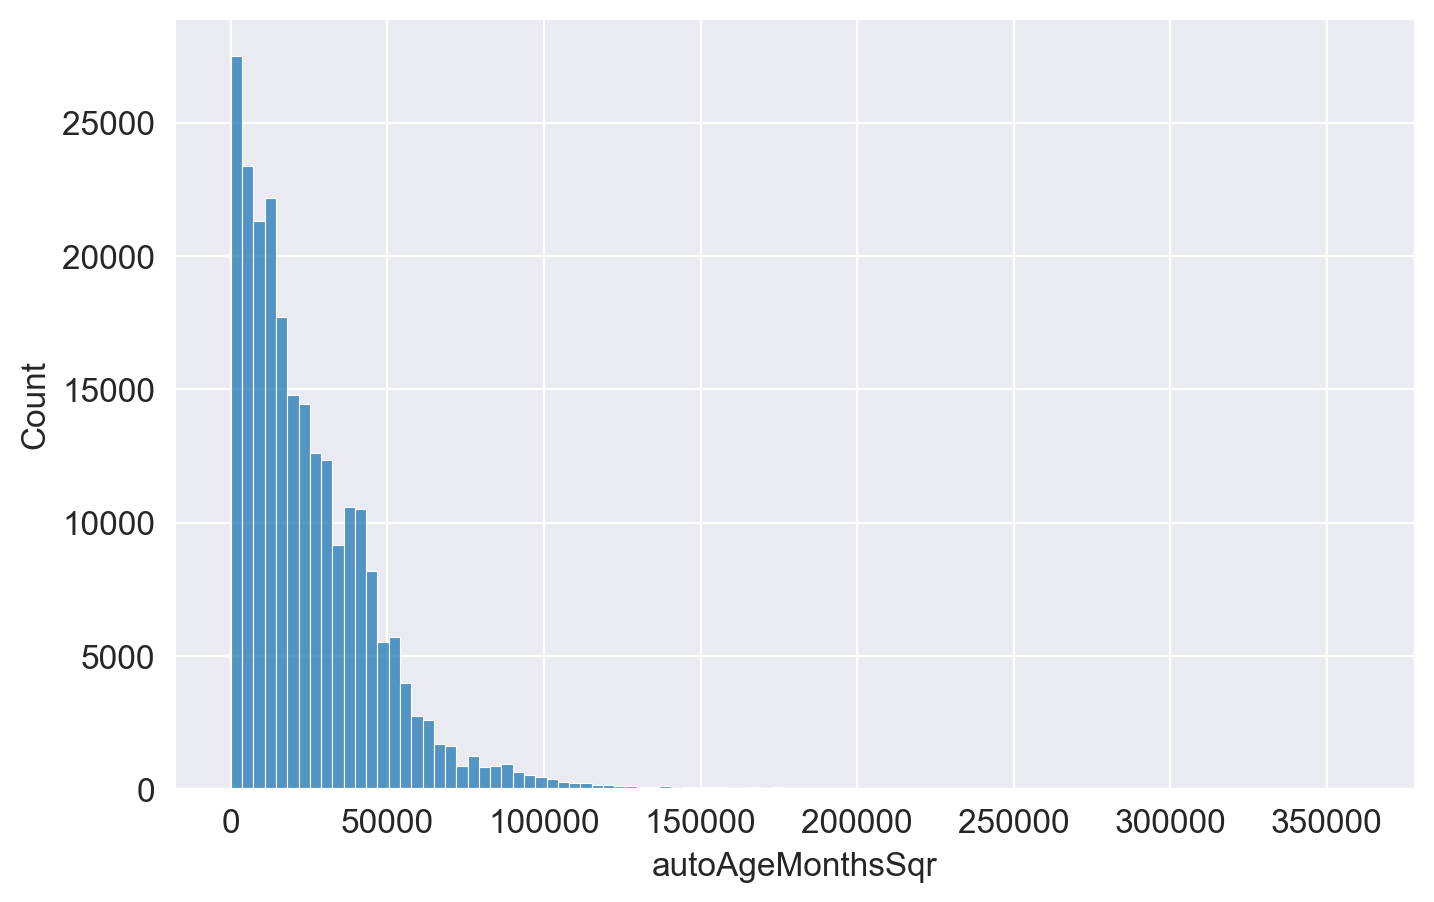

In [22]:
for feature in numeric:
    sns.histplot(data=data, x=feature, bins=100)
    plt.show()

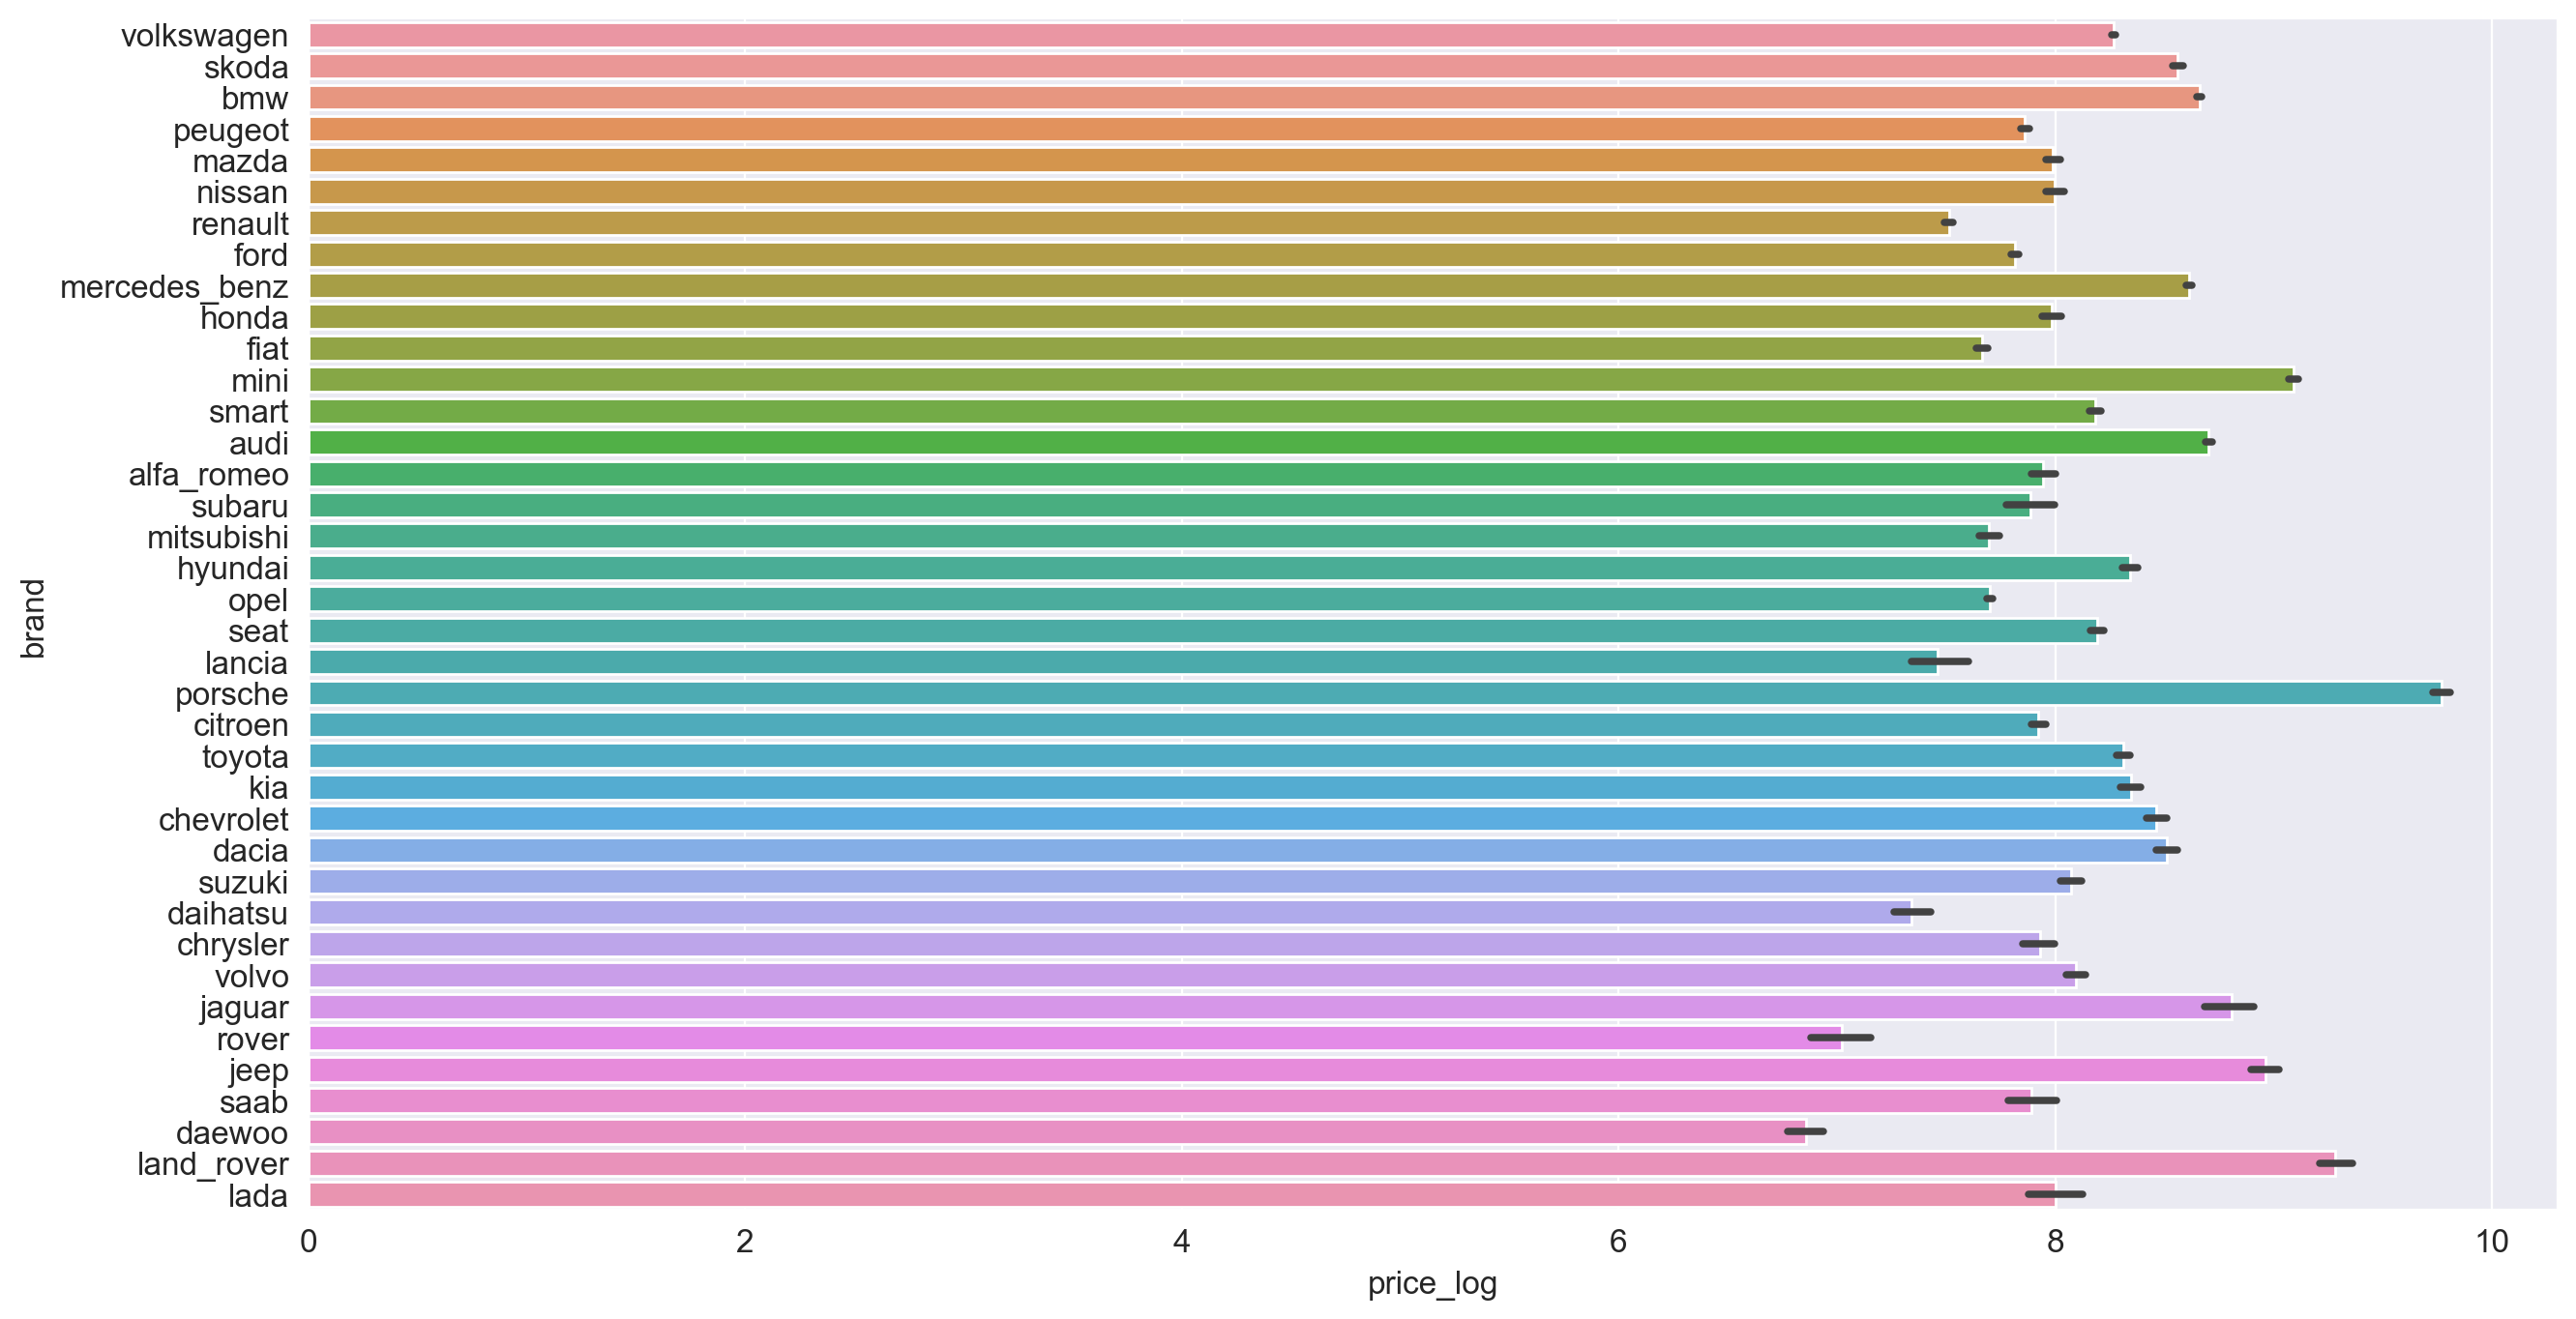

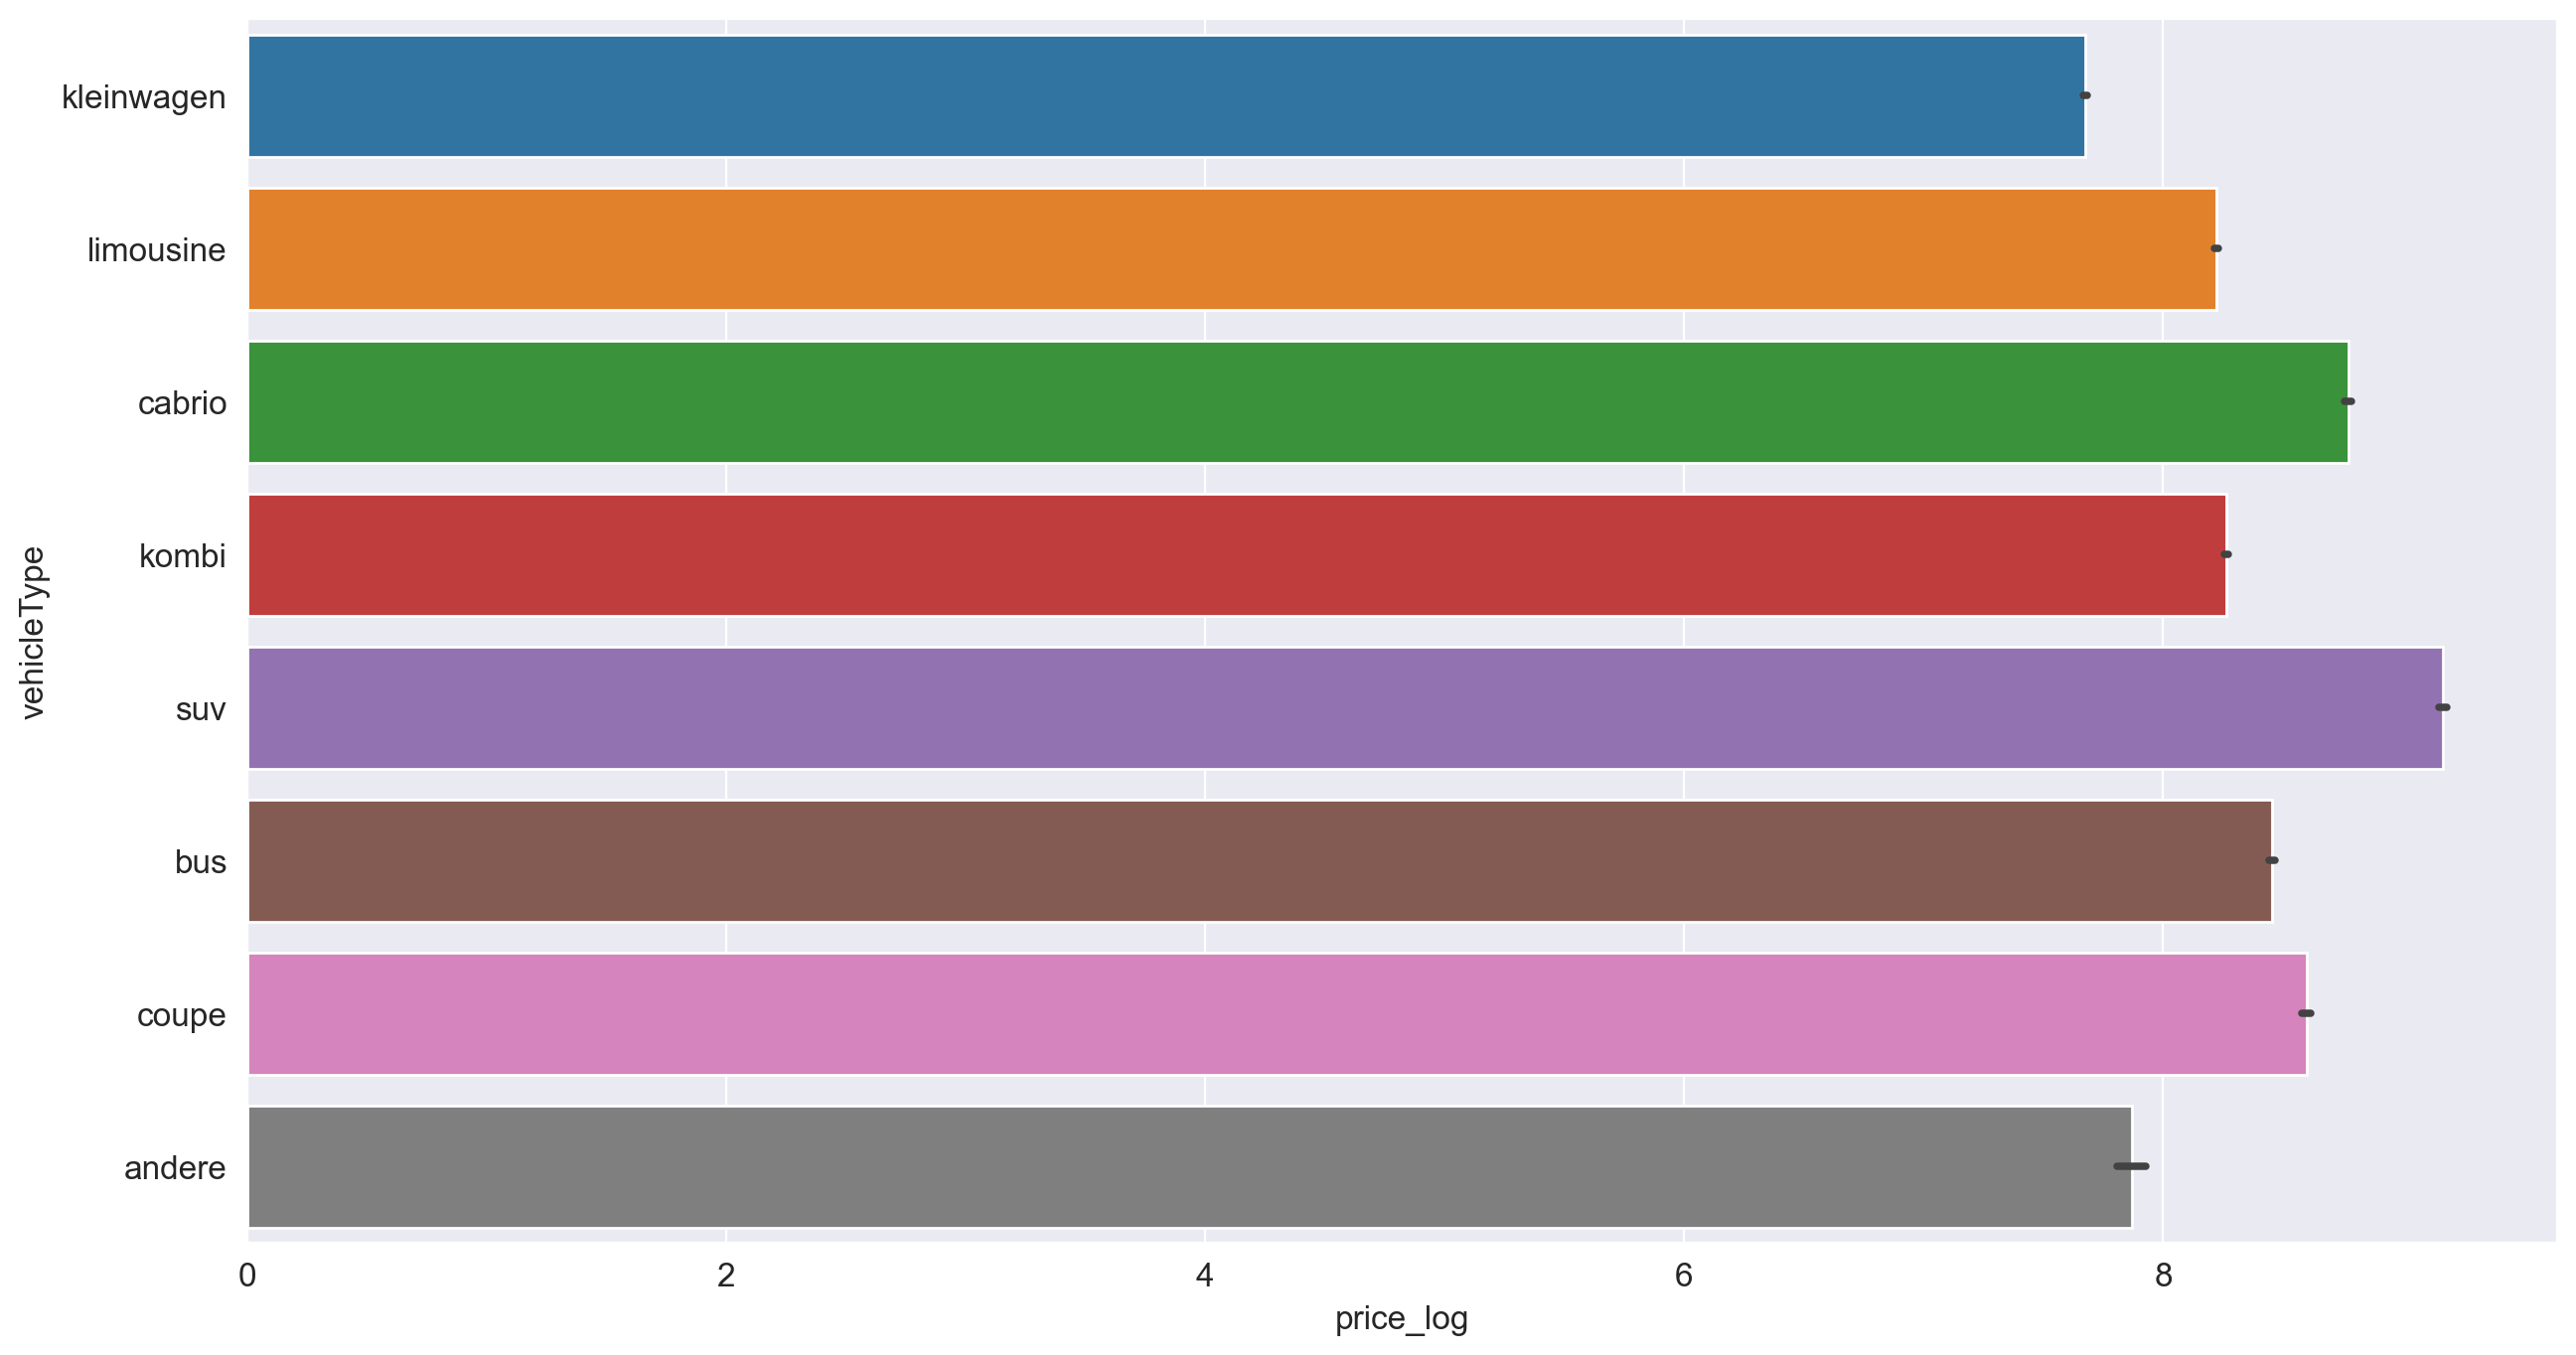

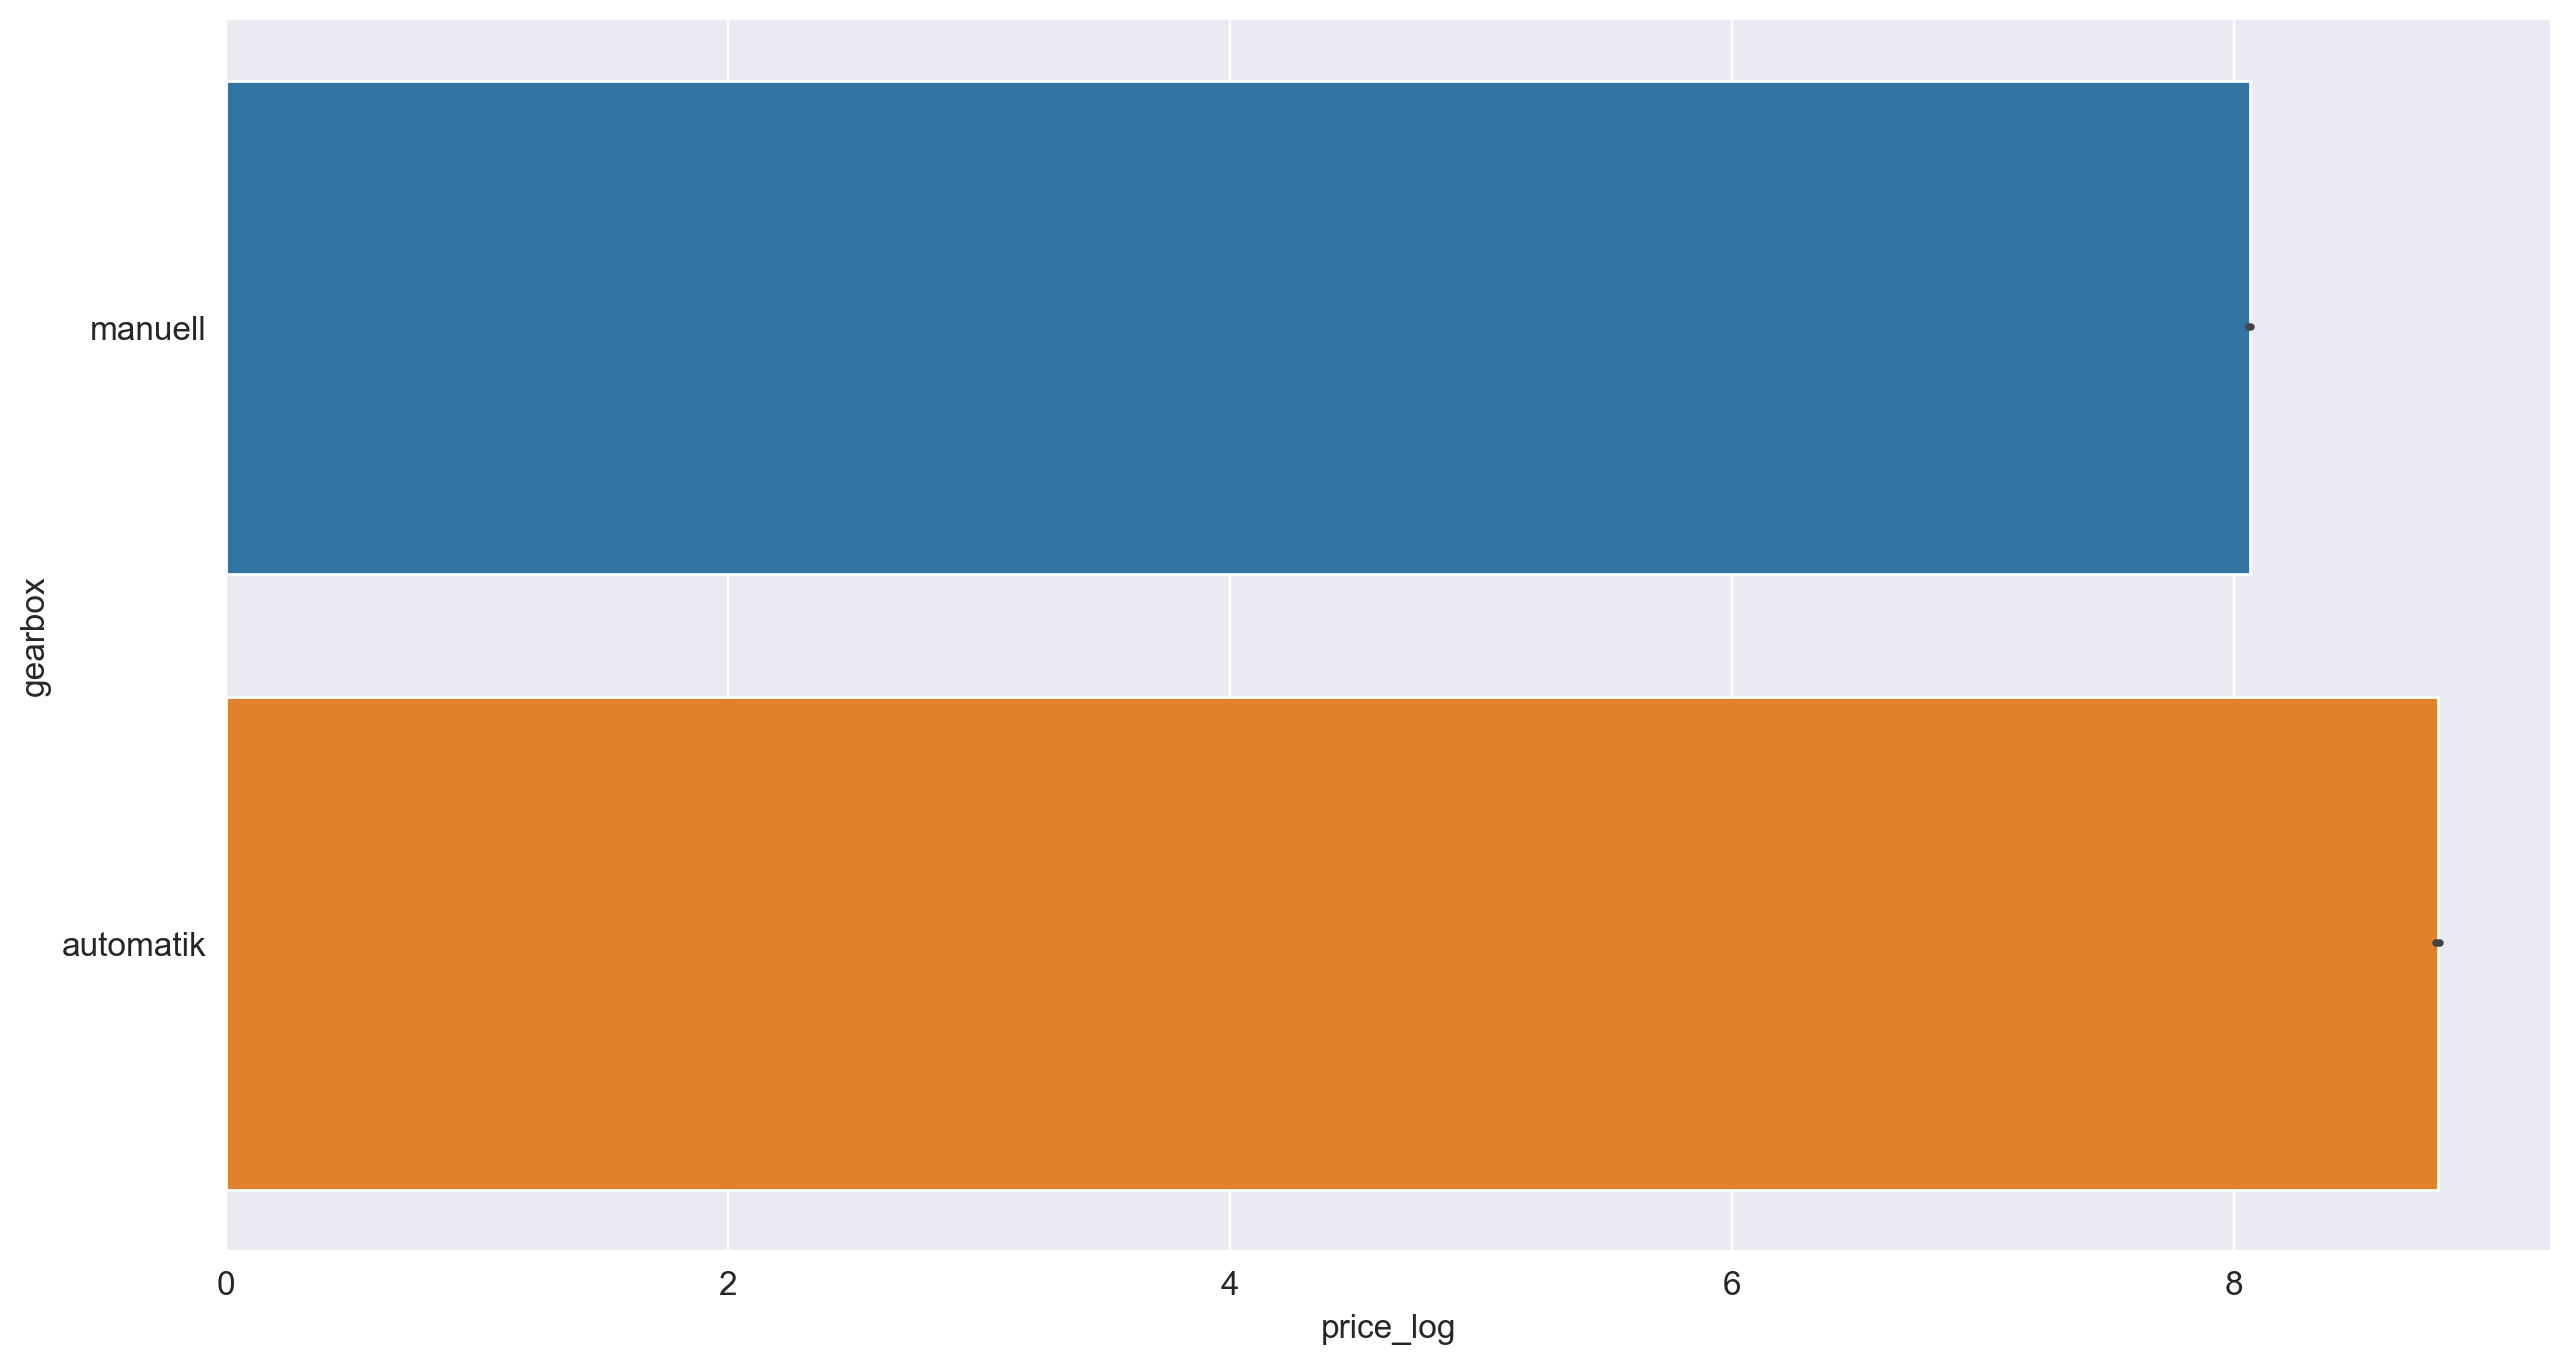

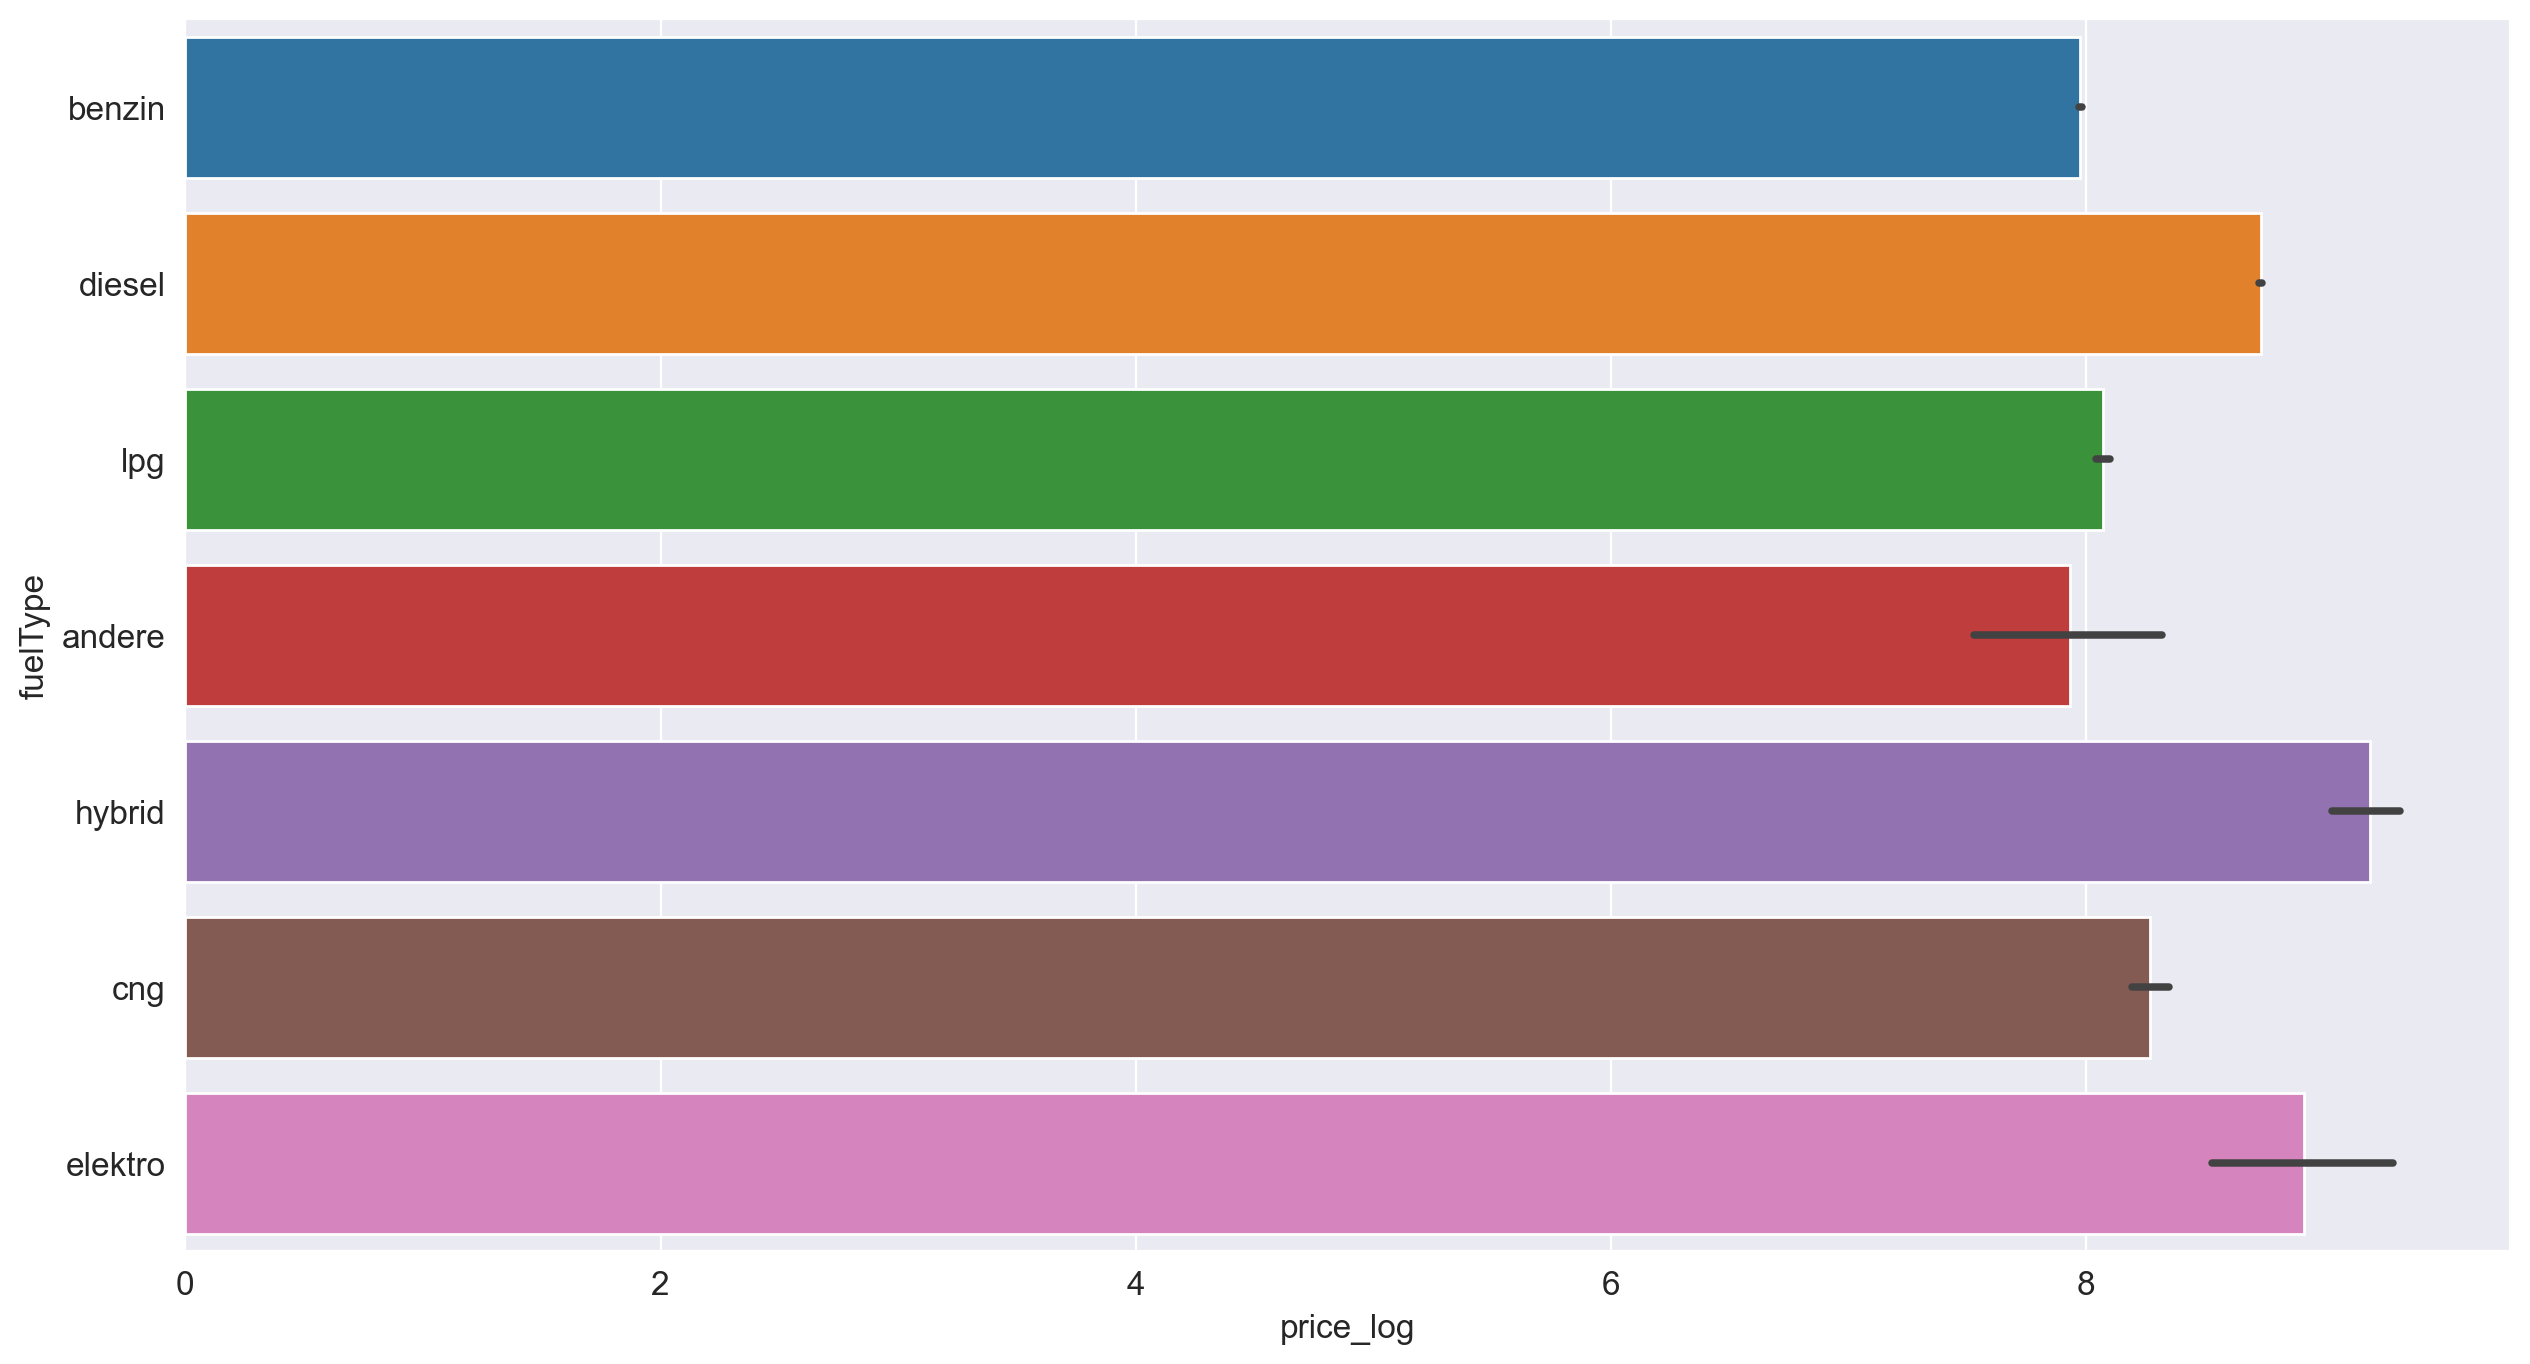

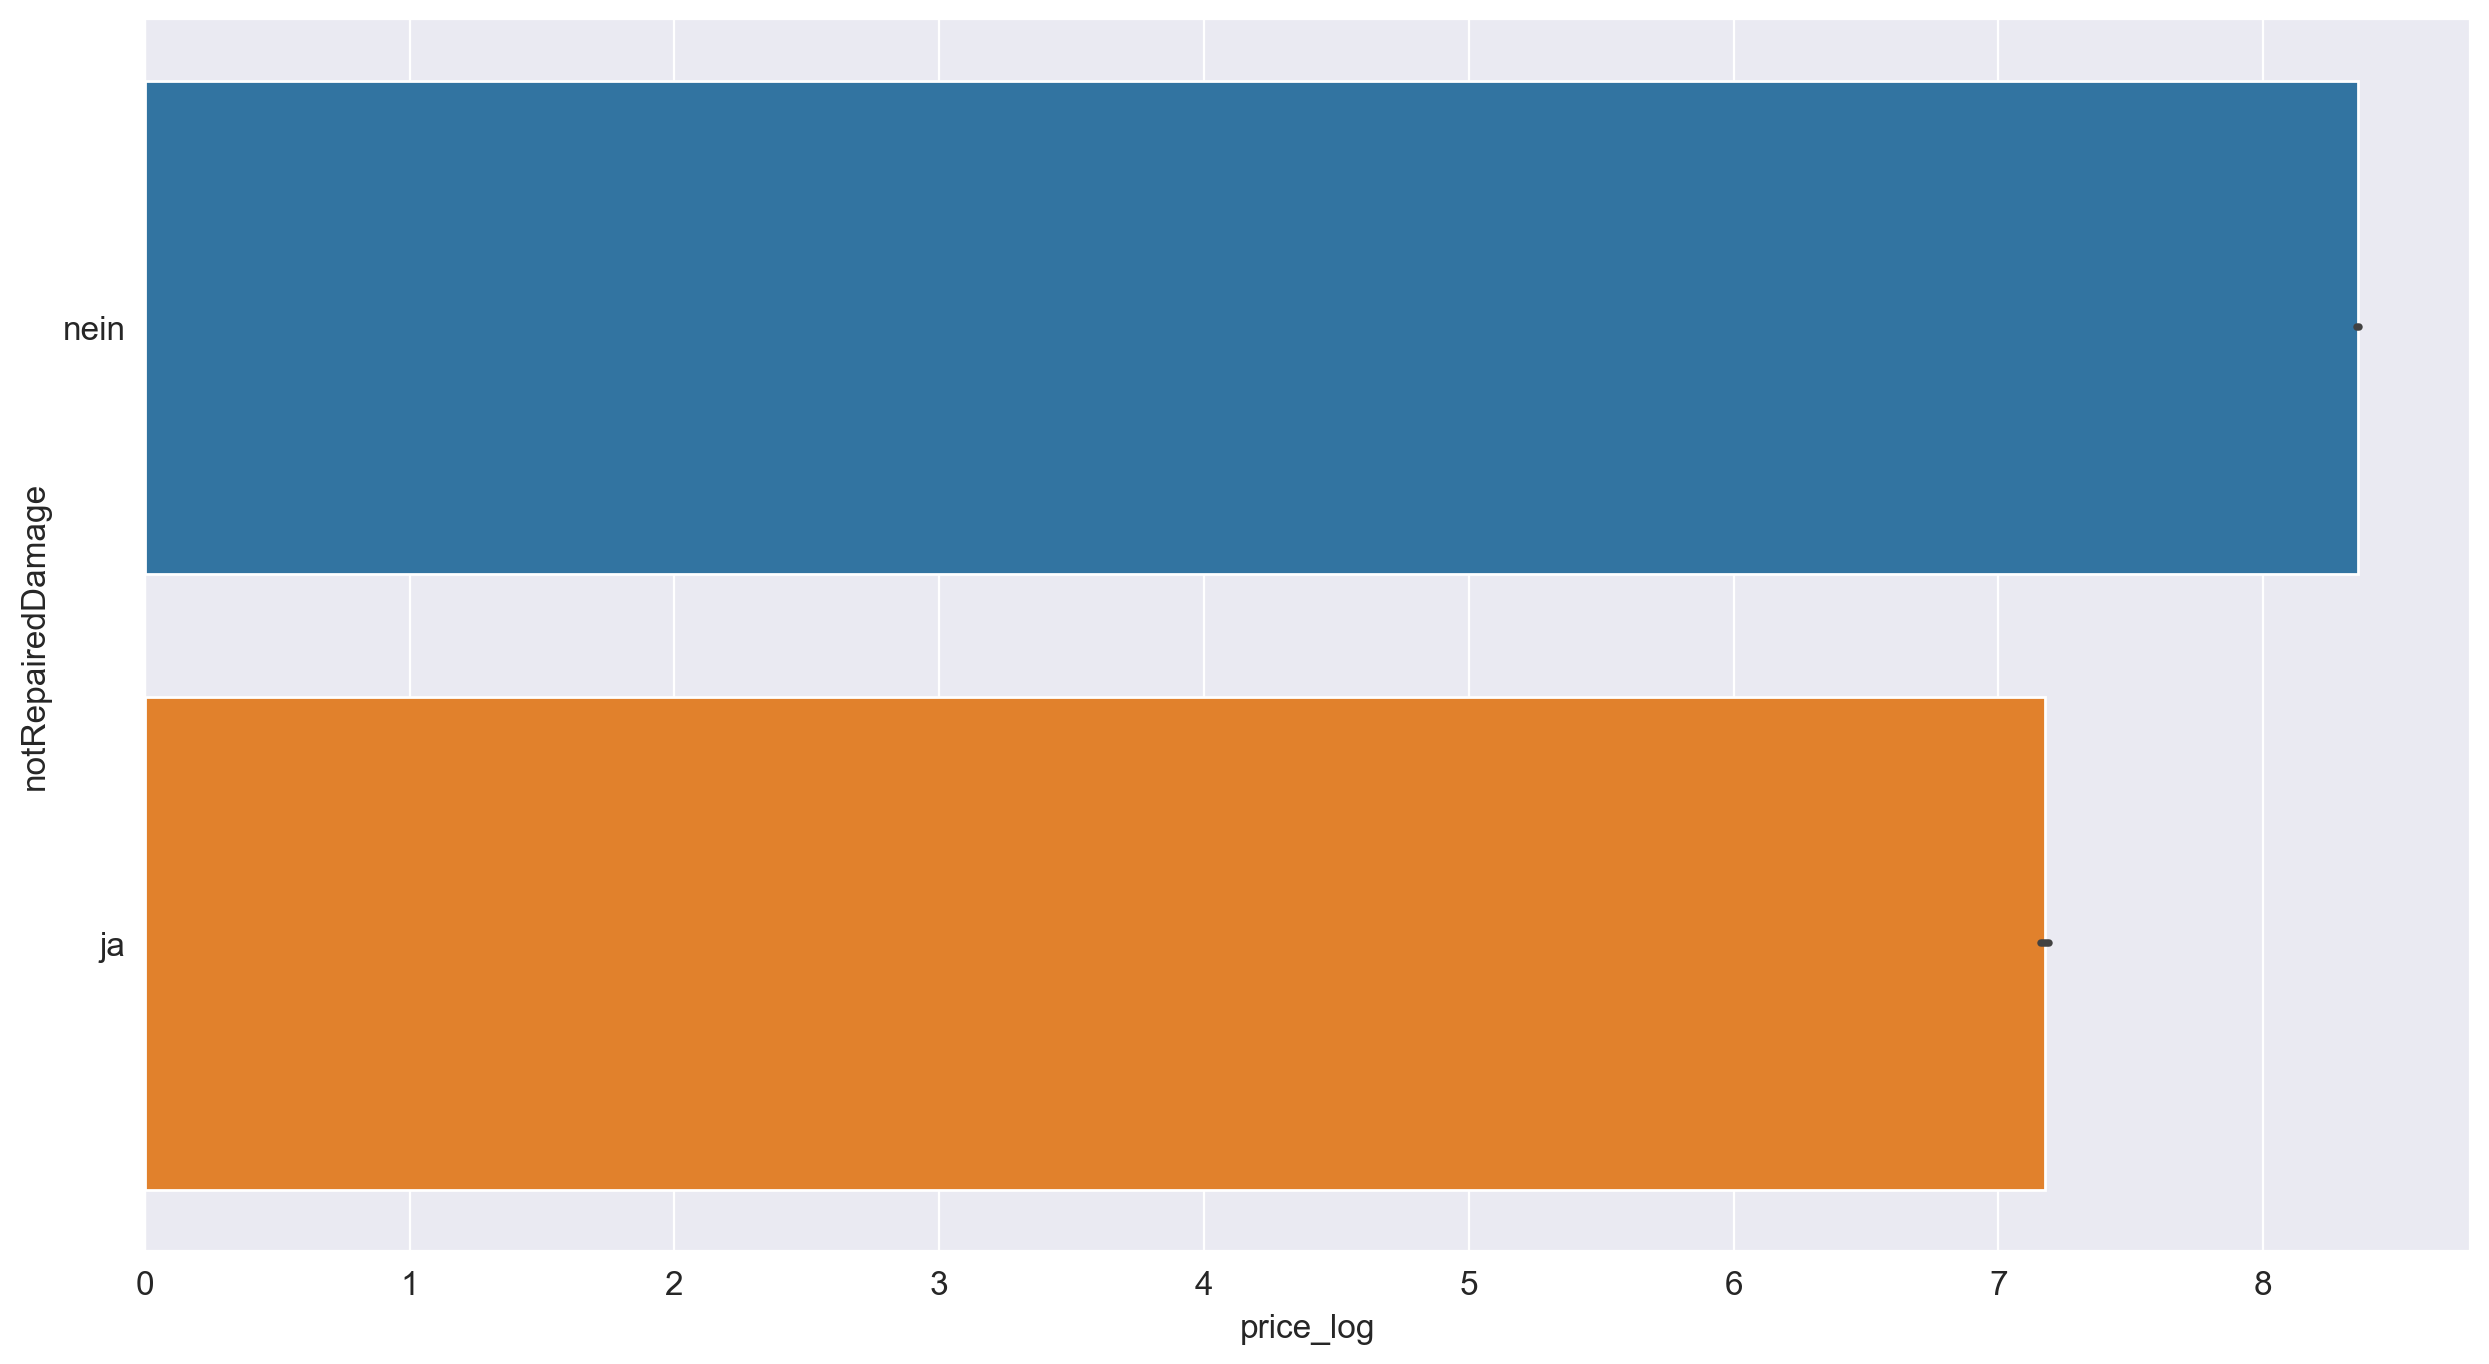

In [23]:
for feature in categorical:
    if feature not in {'low_kilometers', 'model'}:
        plt.figure(figsize=(15, 8))
        sns.barplot(data=data, x='price_log', y=feature)
        plt.show()

In [24]:
data['bias'] = 1
other += ['bias']

x = data[categorical + numeric + other]
y = data['price_log']
x

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,low_kilometers,powerPS,kilometer,autoAgeMonths,autoAgeMonthsSqr,bias
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,False,75,150000,177,31329,1
1,skoda,fabia,kleinwagen,manuell,diesel,nein,False,69,90000,93,8649,1
2,bmw,3er,limousine,manuell,benzin,ja,False,102,150000,246,60516,1
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,False,109,150000,140,19600,1
4,mazda,3_reihe,limousine,manuell,benzin,nein,False,105,150000,136,18496,1
...,...,...,...,...,...,...,...,...,...,...,...,...
241185,volkswagen,golf,limousine,manuell,diesel,nein,False,140,150000,69,4761,1
241186,seat,leon,limousine,manuell,benzin,ja,False,225,150000,142,20164,1
241187,smart,fortwo,cabrio,automatik,benzin,nein,False,101,125000,192,36864,1
241188,volkswagen,transporter,bus,manuell,diesel,nein,False,102,150000,241,58081,1


In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other', 'passthrough', other)
])

x = column_transformer.fit_transform(x)

In [26]:
from sklearn.model_selection import train_test_split

np.random.seed(1324)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5)

X_train.shape[0] / X_val.shape[0]

8.000125622880114

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [27]:
from sklearn.metrics import mean_squared_error

configs = [
    {
        'descent_name': 'full',
        'kwargs': {
            'dimension': X_train.shape[1],
        }
    },
    {
        'descent_name': 'stochastic',
        'kwargs': {
            'dimension': X_train.shape[1],
        }
    },
    {
        'descent_name': 'momentum',
        'kwargs': {
            'dimension': X_train.shape[1],
        }
    },
    {
        'descent_name': 'adam',
        'kwargs': {
            'dimension': X_train.shape[1],
        }
    }
]

lambdas = {
    'full': np.logspace(-1, 0.7, 20),
    'stochastic': np.logspace(-1, 0.7, 20),
    'momentum': np.logspace(-1, 0.7, 20),
    'adam': np.logspace(-1, 0.7, 20)
}

res = {
    'name': [],
    'lambda_': [],
    'mse': []
}

for conf in configs:
    for lambda_ in lambdas[conf['descent_name']]:
        conf['kwargs']['lambda_'] = lambda_
        regression = LinearRegression(
            descent_config=conf
        )

        regression.fit(X_train, y_train.values)
        y_pred_val = regression.predict(X_val)
        mse = mean_squared_error(y_pred_val, y_val)
        res['name'].append(conf['descent_name'])
        res['lambda_'].append(lambda_)
        res['mse'].append(mse)

Stopped by tolerance on step 20
Stopped by tolerance on step 22
Stopped by tolerance on step 28
Stopped by tolerance on step 29
Stopped by tolerance on step 37
Stopped by tolerance on step 32
Stopped by tolerance on step 38
Stopped by tolerance on step 35
Stopped by tolerance on step 45
Stopped by tolerance on step 49
Stopped by tolerance on step 47
Stopped by tolerance on step 56
Stopped by tolerance on step 62
Stopped by tolerance on step 92
Stopped by max iter on step 300
Stopped by max iter on step 300
Stopped by max iter on step 300
Stopped by max iter on step 300
Stopped by max iter on step 300
Stopped by max iter on step 300
Stopped by tolerance on step 30
Stopped by tolerance on step 27
Stopped by tolerance on step 53
Stopped by tolerance on step 101
Stopped by tolerance on step 101
Stopped by tolerance on step 141
Stopped by tolerance on step 129
Stopped by tolerance on step 209
Stopped by tolerance on step 259
Stopped by max iter on step 300
Stopped by max iter on step 300
St

In [28]:
res_df = pd.DataFrame(res).sort_values('mse').groupby('name').head(1)
res_df

,name,lambda_,mse
73,adam,1.455988,0.278006
48,momentum,0.519744,0.300663
13,full,1.455988,0.318485
27,stochastic,0.422976,0.379150


Зададим конфиг с лучшими шагами

In [29]:
configs = [
    {
        'descent_name': 'full',
        'kwargs': {
            'dimension': X_train.shape[1],
            'lambda_': 1.46
        }
    },
    {
        'descent_name': 'stochastic',
        'kwargs': {
            'dimension': X_train.shape[1],
            'lambda_': 0.43
        }
    },
    {
        'descent_name': 'momentum',
        'kwargs': {
            'dimension': X_train.shape[1],
            'lambda_': 0.52
        }
    },
    {
        'descent_name': 'adam',
        'kwargs': {
            'dimension': X_train.shape[1],
            'lambda_': 1.46
        }
    }
]

In [30]:
from sklearn.metrics import r2_score

metrics = []
mse_histories_first = []

for i, conf in enumerate(configs):
    regression = LinearRegression(
        descent_config=conf
    )
    regression.fit(X_train, y_train.values)
    y_pred = regression.predict(X_test)
    cur_reg = {
        'name': conf['descent_name'],
        'R^2': r2_score(y_true=y_test, y_pred=y_pred),
        'test_mse': mean_squared_error(y_true=y_test, y_pred=y_pred),
        'train_mse': mean_squared_error(y_true=y_train, y_pred=regression.predict(X_train)),
        'steps_before_stop': len(regression.loss_history) - 1  # -1 тк финальный лосс не делает шаг
    }
    metrics.append(cur_reg)
    mse_histories_first.append(regression.loss_history)

Stopped by tolerance on step 93
Stopped by tolerance on step 214
Stopped by tolerance on step 96
Stopped by tolerance on step 132


In [31]:
first_metrics = pd.DataFrame(metrics)
first_metrics

,name,R^2,test_mse,train_mse,steps_before_stop
0,full,0.759061,0.298005,0.319737,94
1,stochastic,0.712946,0.355043,0.377574,215
2,momentum,0.782589,0.268905,0.292238,97
3,adam,0.805898,0.240075,0.261445,133



### Задание 5.2. Сравнение методов (1 балла)

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

In [32]:
res = {
    'full': [],
    'stochastic': [],
    'momentum': [],
    'adam': []
}

for i, k in enumerate(res):
    regression = LinearRegression(
        descent_config=configs[i]
    )
    regression.fit(X_train, y_train.values)
    res[k] = regression.loss_history


Stopped by tolerance on step 93
Stopped by tolerance on step 163
Stopped by tolerance on step 101
Stopped by tolerance on step 152


In [33]:
res_df = pd.DataFrame.from_dict(res, orient='index')
res_df

,0,1,2,3,4,5,6,7,8,9,...,155,156,157,158,159,160,161,162,163,164
full,23.661570,1254.308216,48510.736770,1.368053e+06,2.963741e+07,5.137615e+08,7.343831e+09,8.853067e+10,9.158087e+11,8.241877e+12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
stochastic,18.603837,57.128264,53.891800,3.699774e+01,1.164379e+01,3.119367e+00,1.323972e+00,8.761860e-01,8.173226e-01,8.981929e-01,...,0.385873,0.386774,0.386083,0.385855,0.386462,0.385455,0.385014,0.386017,0.387807,0.387452
momentum,26.899044,106.737455,15.746746,6.742935e+01,1.640272e+01,6.231454e+01,4.083668e+00,5.590908e+01,6.431006e+00,3.739462e+01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
adam,24.675645,15.970029,18.838413,6.494711e+00,1.321666e+00,3.965981e+00,7.057179e+00,6.833131e+00,4.357449e+00,1.954721e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


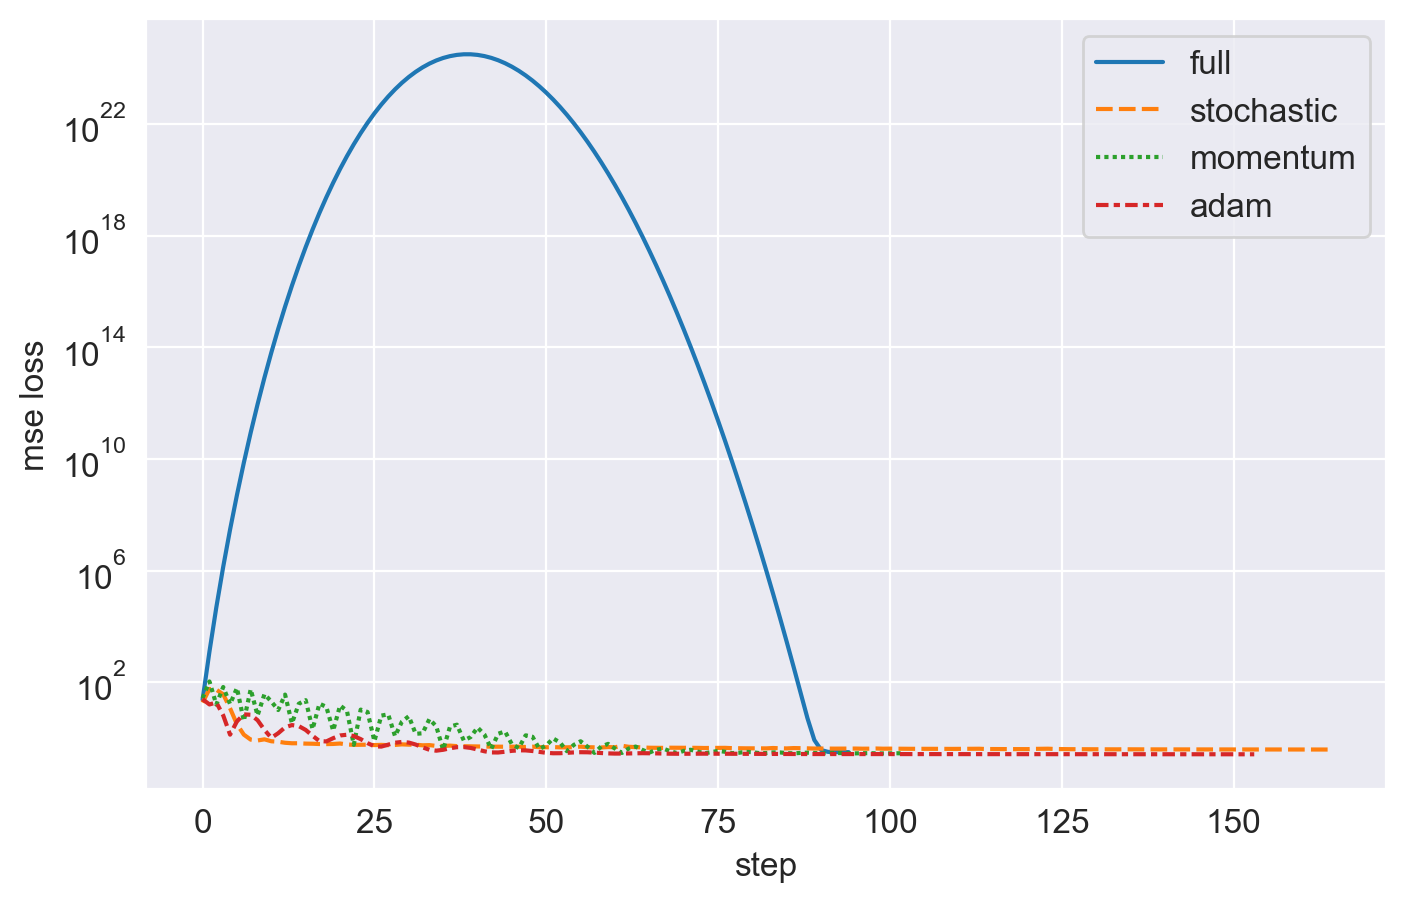

In [34]:
g = sns.lineplot(res_df.T)
g.set_yscale('log')
g.set_xlabel('step')
g.set_ylabel('mse loss')
plt.show()

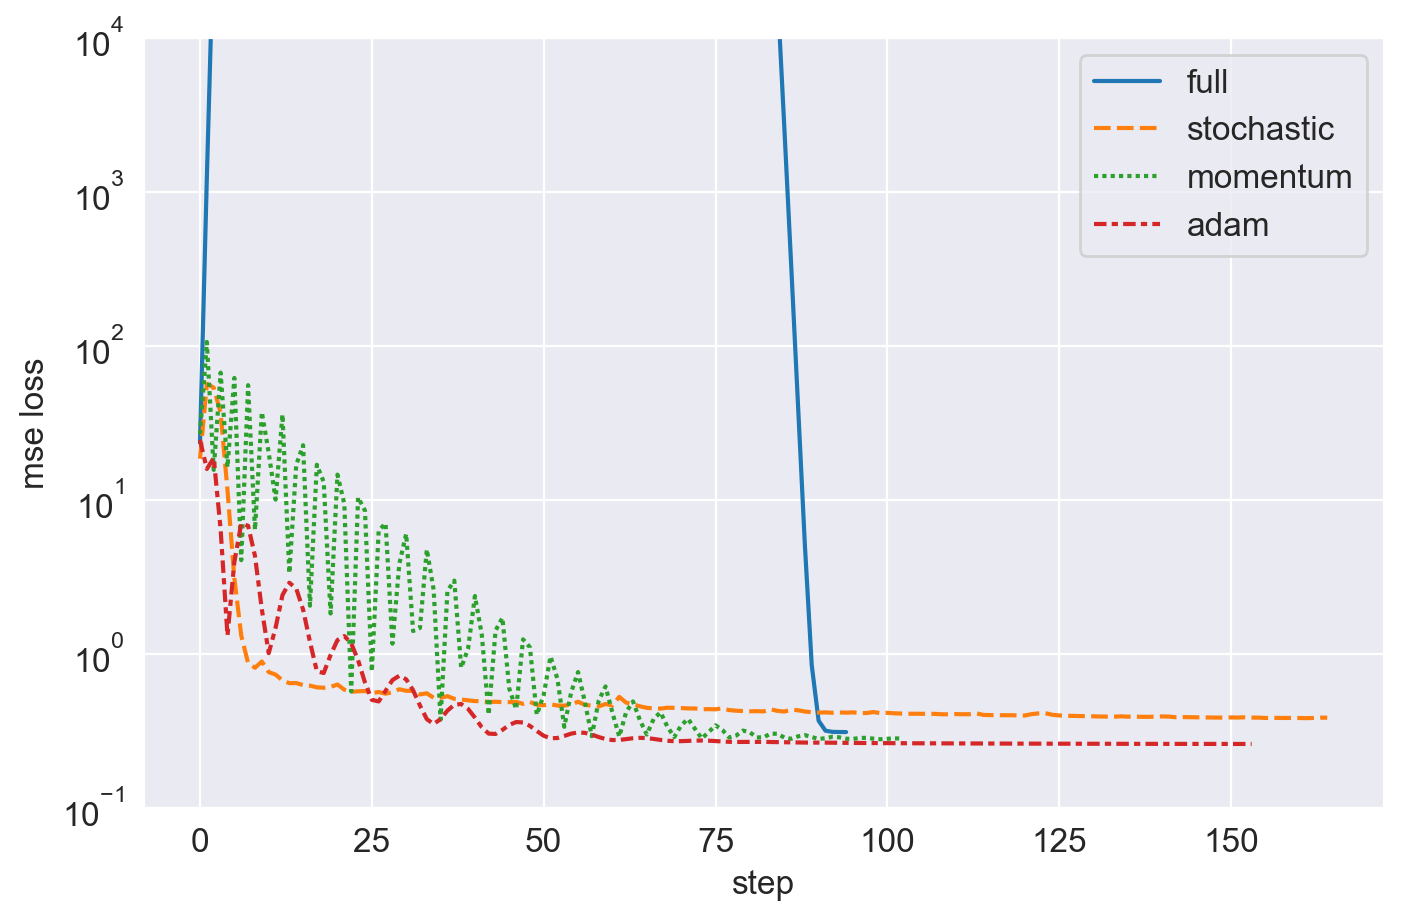

In [35]:
g = sns.lineplot(res_df.T)
g.set_yscale('log')
g.set_ylim((1e-1, 10e3))
g.set_xlabel('step')
g.set_ylabel('mse loss')

plt.show()

Лучше всех себя показывает самый навороченный adam, у него наилучшие метрики. Далее идет momentum. Скорее всего, методы с инерцией работают лучше, так как поверхность с таким большим числом признаков очень сложная. SGD слабоват, оно и понятно, ведь это лишь оценка градиента 10-ю объектами на каждом шаге, для лучшего итогового лосса ему нужно хорошо подбирать затухание шага.
Ну а полный GD конечно лучше SGD, но хуже методов с моментом. По графикам лосса: есть ощущение, что изначальный шаг для полного GD слишком велик, он начинает расходиться, но мудрая формула длины шага делает свое дело и в конечном итоге за пару итераций он сходится. SGD идет с небольшими нестабильностями, но быстро выходит на плато, после чего лосс перестает падать (сказано выше). Momentum очень сильно расшакаливает, что для меня неожиданно, так как исходя из теории он наоборот должен бороться с таким (вероятно, пока его колбасит, он как раз накапливает инерцию, а потом идет уже плавно и куда нужно). Adam похож на momentum, но его движения плавнее. Возможно эти колебания могут быть еще связаны с крутой формулой затухания шага.

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [36]:
import time

np.random.seed(412)
batch_sizes = np.arange(5, 500, 10)
k = 20

sgd_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': X_train.shape[1],
        'lambda_': 0.43,
        'batch_size': -1
    }
}

final_sgd_metrics = {
    'batch_size': [],
    'avg_time': [],
    'avg_steps': []
}

for batch_size in batch_sizes:
    sgd_metrics = {
        'time': [],
        'steps': []
    }
    sgd_config['kwargs']['batch_size'] = batch_size

    for it in range(k):
        start_time = time.time()
        regression = LinearRegression(
            descent_config=sgd_config,
        )
        regression.fit(X_train, y_train.values)
        end_time = time.time()

        sgd_metrics['time'].append(end_time - start_time)
        sgd_metrics['steps'].append(len(regression.loss_history) - 1)
    final_sgd_metrics['avg_time'].append(np.mean(sgd_metrics['time']))
    final_sgd_metrics['avg_steps'].append(np.mean(sgd_metrics['steps']))
    final_sgd_metrics['batch_size'].append(batch_size)

Stopped by tolerance on step 216
Stopped by tolerance on step 214
Stopped by max iter on step 300
Stopped by tolerance on step 282
Stopped by max iter on step 300
Stopped by tolerance on step 267
Stopped by max iter on step 300
Stopped by max iter on step 300
Stopped by max iter on step 300
Stopped by tolerance on step 209
Stopped by tolerance on step 186
Stopped by tolerance on step 293
Stopped by max iter on step 300
Stopped by tolerance on step 257
Stopped by tolerance on step 172
Stopped by tolerance on step 191
Stopped by tolerance on step 250
Stopped by tolerance on step 211
Stopped by tolerance on step 282
Stopped by max iter on step 300
Stopped by tolerance on step 278
Stopped by max iter on step 300
Stopped by max iter on step 300
Stopped by max iter on step 300
Stopped by tolerance on step 266
Stopped by max iter on step 300
Stopped by tolerance on step 245
Stopped by tolerance on step 267
Stopped by tolerance on step 283
Stopped by max iter on step 300
Stopped by max iter on

In [37]:
sgd_metrics = pd.DataFrame(final_sgd_metrics)
sgd_metrics

,batch_size,avg_time,avg_steps
0,5,1.038391,257.15
1,15,1.112880,281.10
2,25,0.984299,243.90
3,35,0.843168,207.10
4,45,0.717347,183.65
5,55,0.665415,170.45
6,65,0.662728,163.85
7,75,0.633450,153.25
8,85,0.551748,132.75
9,95,0.504557,134.30


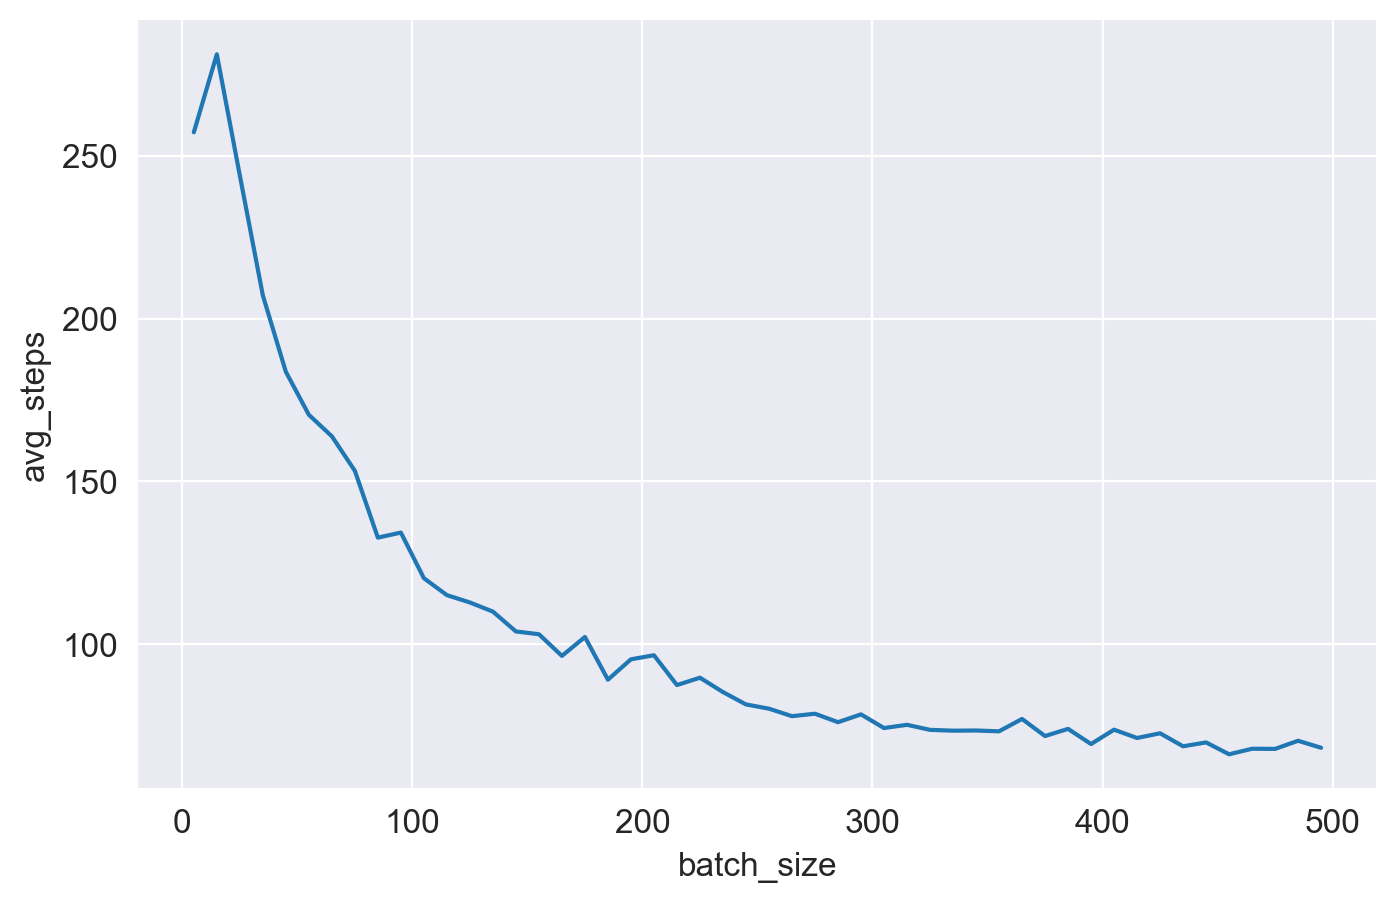

In [38]:
sns.lineplot(data=sgd_metrics, x='batch_size', y='avg_steps')
plt.show()

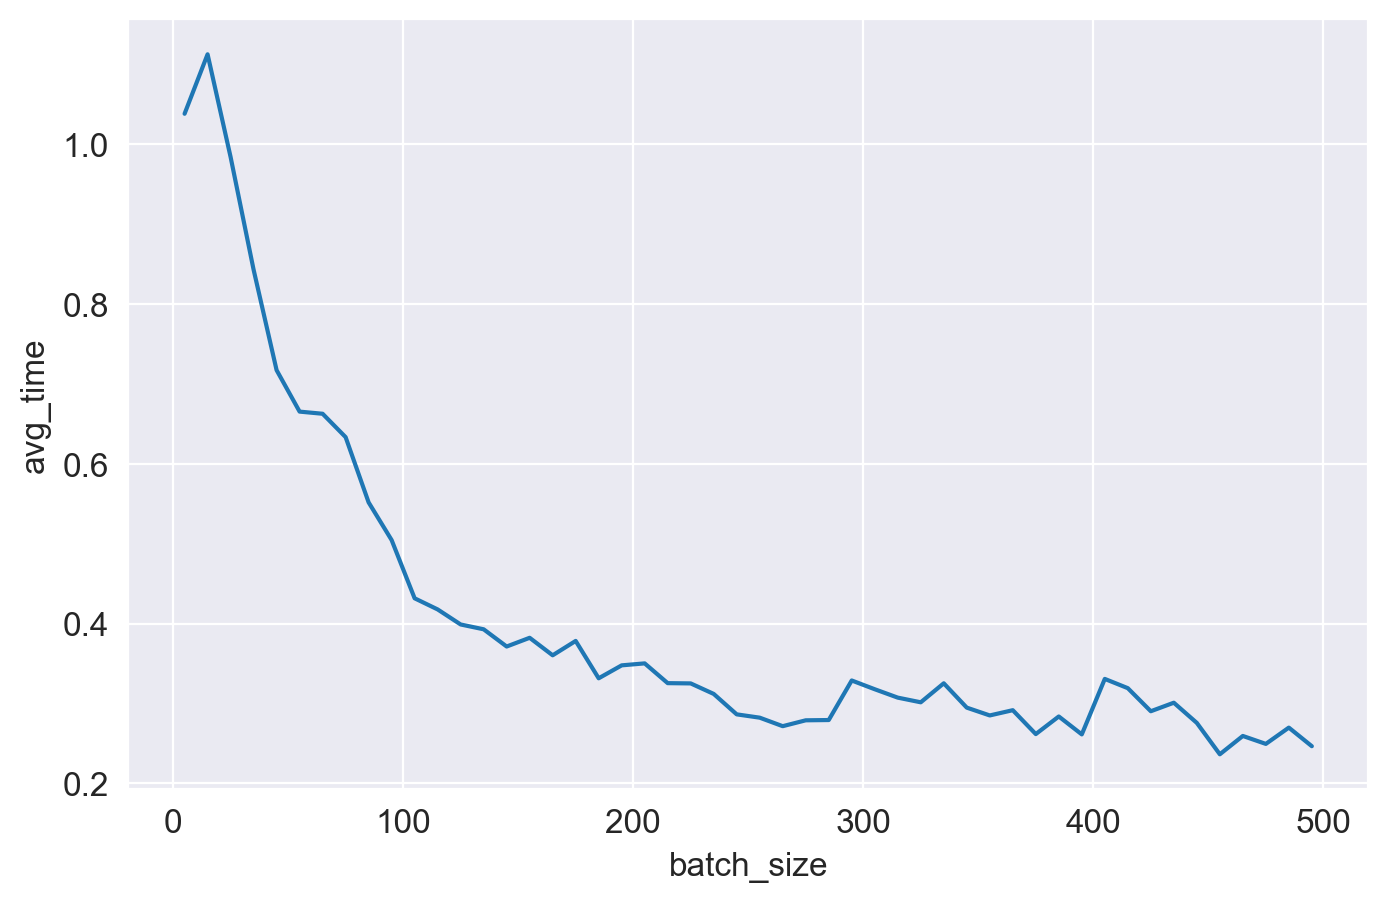

In [39]:
sns.lineplot(data=sgd_metrics, x='batch_size', y='avg_time')
plt.show()

И число итераций до сходимости, и время сходимости падает при увеличении batch_size, так как оценка градиента становится точнее и спуск идет четче к минимуму.
Однако время одной итерации определенно должно быть меньше, чем меньше размер батча (считаем градиент на меньшем числе объектов). Но в финальное время до сходимости это вносит меньший вклад, чем точность оценки градиента (так как все равно при увеличении размера батча падает время до сходимости)

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**: https://contest.yandex.ru/contest/41257/run-report/72574138/

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [40]:
from sklearn.metrics import mean_squared_error

np.random.seed(432)
configs = [
    {
        'descent_name': 'full',
        'regularized': True,
        'kwargs': {
            'dimension': X_train.shape[1],
        }
    },
    {
        'descent_name': 'stochastic',
        'regularized': True,
        'kwargs': {
            'dimension': X_train.shape[1],
        }
    },
    {
        'descent_name': 'momentum',
        'regularized': True,
        'kwargs': {
            'dimension': X_train.shape[1],
        }
    },
    {
        'descent_name': 'adam',
        'regularized': True,
        'kwargs': {
            'dimension': X_train.shape[1],
        }
    }
]

lambdas = {
    'full': np.logspace(-1, 0.7, 10),
    'stochastic': np.logspace(-1, 0.7, 10),
    'momentum': np.logspace(-1, 0.7, 10),
    'adam': np.logspace(-1, 0.7, 10)
}

mus = {
    'full': np.logspace(-5, 0, 10),
    'stochastic': np.logspace(-5, 0, 10),
    'momentum': np.logspace(-5, 0, 10),
    'adam': np.logspace(-5, 0, 10)
}

res = {
    'name': [],
    'lambda_': [],
    'mu': [],
    'mse': []
}

for conf in configs:
    for lambda_ in lambdas[conf['descent_name']]:
        for mu in mus[conf['descent_name']]:
            conf['kwargs']['lambda_'] = lambda_
            conf['kwargs']['mu'] = mu
            regression = LinearRegression(
                descent_config=conf
            )

            regression.fit(X_train, y_train.values)
            y_pred_val = regression.predict(X_val)
            mse = mean_squared_error(y_pred_val, y_val)
            res['name'].append(conf['descent_name'])
            res['lambda_'].append(lambda_)
            res['mse'].append(mse)
            res['mu'].append(mu)

Stopped by tolerance on step 30
Stopped by tolerance on step 20
Stopped by tolerance on step 18
Stopped by tolerance on step 24
Stopped by tolerance on step 19
Stopped by tolerance on step 23
Stopped by tolerance on step 23
Stopped by tolerance on step 65
Stopped by tolerance on step 202
Stopped by tolerance on step 169
Stopped by tolerance on step 26
Stopped by tolerance on step 27
Stopped by tolerance on step 35
Stopped by tolerance on step 30
Stopped by tolerance on step 25
Stopped by tolerance on step 35
Stopped by tolerance on step 38
Stopped by tolerance on step 105
Stopped by tolerance on step 207
Stopped by tolerance on step 167
Stopped by tolerance on step 30
Stopped by tolerance on step 32
Stopped by tolerance on step 28
Stopped by tolerance on step 32
Stopped by tolerance on step 33
Stopped by tolerance on step 27
Stopped by tolerance on step 46
Stopped by tolerance on step 159
Stopped by tolerance on step 208
Stopped by tolerance on step 154
Stopped by tolerance on step 31


C:\Users\dm1tr\Desktop\machine-learning-first\venv\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\dm1tr\Desktop\machine-learning-first\HW3-GD\descents.py:85: RuntimeWarning: overflow encountered in square
  return np.average((x.dot(self.w) - y) ** 2)


Stopped by max iter on step 300
Stopped by tolerance on step 49


C:\Users\dm1tr\Desktop\machine-learning-first\venv\lib\site-packages\sklearn\metrics\_regression.py:446: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)


Stopped by tolerance on step 31
Stopped by tolerance on step 46
Stopped by tolerance on step 47
Stopped by tolerance on step 31
Stopped by tolerance on step 35
Stopped by tolerance on step 37
Stopped by tolerance on step 72
Stopped by tolerance on step 211
Stopped by tolerance on step 196
Stopped by tolerance on step 39
Stopped by tolerance on step 79
Stopped by tolerance on step 55
Stopped by tolerance on step 64
Stopped by tolerance on step 68
Stopped by tolerance on step 51
Stopped by tolerance on step 75
Stopped by tolerance on step 133
Stopped by tolerance on step 234
Stopped by tolerance on step 191
Stopped by tolerance on step 63
Stopped by tolerance on step 52
Stopped by tolerance on step 51
Stopped by tolerance on step 110
Stopped by tolerance on step 108
Stopped by tolerance on step 82
Stopped by tolerance on step 110
Stopped by tolerance on step 195
Stopped by tolerance on step 244
Stopped by tolerance on step 195
Stopped by tolerance on step 100
Stopped by tolerance on step

C:\Users\dm1tr\Desktop\machine-learning-first\venv\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\dm1tr\Desktop\machine-learning-first\HW3-GD\descents.py:85: RuntimeWarning: overflow encountered in square
  return np.average((x.dot(self.w) - y) ** 2)
C:\Users\dm1tr\Desktop\machine-learning-first\venv\lib\site-packages\sklearn\metrics\_regression.py:446: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)


Stopped by max iter on step 300
Stopped by tolerance on step 74
Stopped by tolerance on step 74
Stopped by tolerance on step 74
Stopped by tolerance on step 74
Stopped by tolerance on step 74
Stopped by tolerance on step 84
Stopped by tolerance on step 195
Stopped by tolerance on step 184
Stopped by tolerance on step 136
Stopped by tolerance on step 95
Stopped by tolerance on step 85
Stopped by tolerance on step 78
Stopped by tolerance on step 85
Stopped by tolerance on step 85
Stopped by tolerance on step 85
Stopped by tolerance on step 109
Stopped by tolerance on step 212
Stopped by tolerance on step 163
Stopped by tolerance on step 106
Stopped by tolerance on step 94
Stopped by tolerance on step 82
Stopped by tolerance on step 89
Stopped by tolerance on step 89
Stopped by tolerance on step 82
Stopped by tolerance on step 89
Stopped by tolerance on step 138
Stopped by tolerance on step 213
Stopped by tolerance on step 154
Stopped by tolerance on step 87
Stopped by tolerance on step 1

In [41]:
res_df = pd.DataFrame(res).sort_values('mse').groupby('name').head(1)
res_df

,name,lambda_,mu,mse
361,adam,1.359356,0.000036,0.278134
255,momentum,0.879923,0.005995,0.287993
66,full,1.359356,0.021544,0.310881
147,stochastic,0.569581,0.077426,0.350059


In [42]:
last_configs = [
    {
        'descent_name': 'full',
        'regularized': True,
        'kwargs': {
            'dimension': X_train.shape[1],
            'lambda_': 1.36,
            'mu': 0.021544,
        }
    },
    {
        'descent_name': 'stochastic',
        'regularized': True,
        'kwargs': {
            'dimension': X_train.shape[1],
            'lambda_': 0.57,
            'mu': 0.077426,
        }
    },
    {
        'descent_name': 'momentum',
        'regularized': True,
        'kwargs': {
            'dimension': X_train.shape[1],
            'lambda_': 0.879923,
            'mu': 0.006,
        }
    },
    {
        'descent_name': 'adam',
        'regularized': True,
        'kwargs': {
            'dimension': X_train.shape[1],
            'lambda_': 1.36,
            'mu': 0.000036,
        }
    }
]

In [43]:
from sklearn.metrics import r2_score

metrics = []
mse_histories_second = []

for i, conf in enumerate(last_configs):
    regression = LinearRegression(
        descent_config=conf
    )
    regression.fit(X_train, y_train.values)
    y_pred = regression.predict(X_test)
    cur_reg = {
        'name': conf['descent_name'],
        'R^2': r2_score(y_true=y_test, y_pred=y_pred),
        'test_mse': mean_squared_error(y_true=y_test, y_pred=y_pred),
        'train_mse': mean_squared_error(y_true=y_train, y_pred=regression.predict(X_train)),
        'steps_before_stop': len(regression.loss_history) - 1  # -1 тк финальный лосс не делает шаг
    }
    metrics.append(cur_reg)
    mse_histories_second.append(regression.loss_history)

Stopped by tolerance on step 203
Stopped by max iter on step 300
Stopped by tolerance on step 207
Stopped by tolerance on step 222


In [44]:
first_metrics['regularized'] = False

In [45]:
second_metrics = pd.DataFrame(metrics)
second_metrics['regularized'] = True

In [46]:
both_metrics = pd.concat([first_metrics, second_metrics])
both_metrics.sort_values(['name', 'test_mse'])

,name,R^2,test_mse,train_mse,steps_before_stop,regularized
3,adam,0.806121,0.239799,0.261468,223,True
3,adam,0.805898,0.240075,0.261445,133,False
0,full,0.780486,0.271506,0.293334,204,True
0,full,0.759061,0.298005,0.319737,94,False
2,momentum,0.799149,0.248422,0.270333,208,True
2,momentum,0.782589,0.268905,0.292238,97,False
1,stochastic,0.757159,0.300358,0.322474,300,True
1,stochastic,0.712946,0.355043,0.377574,215,False


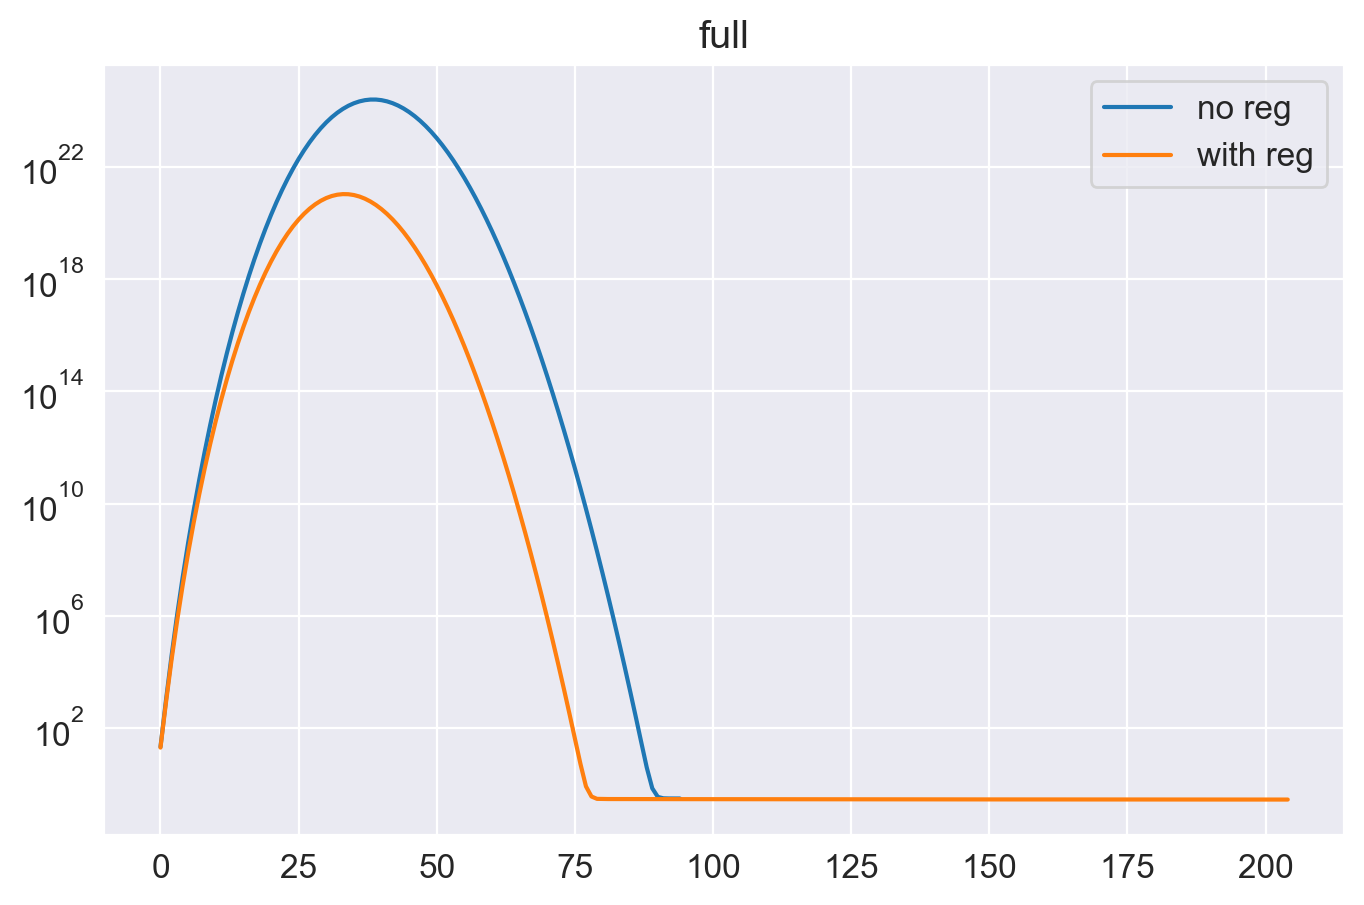

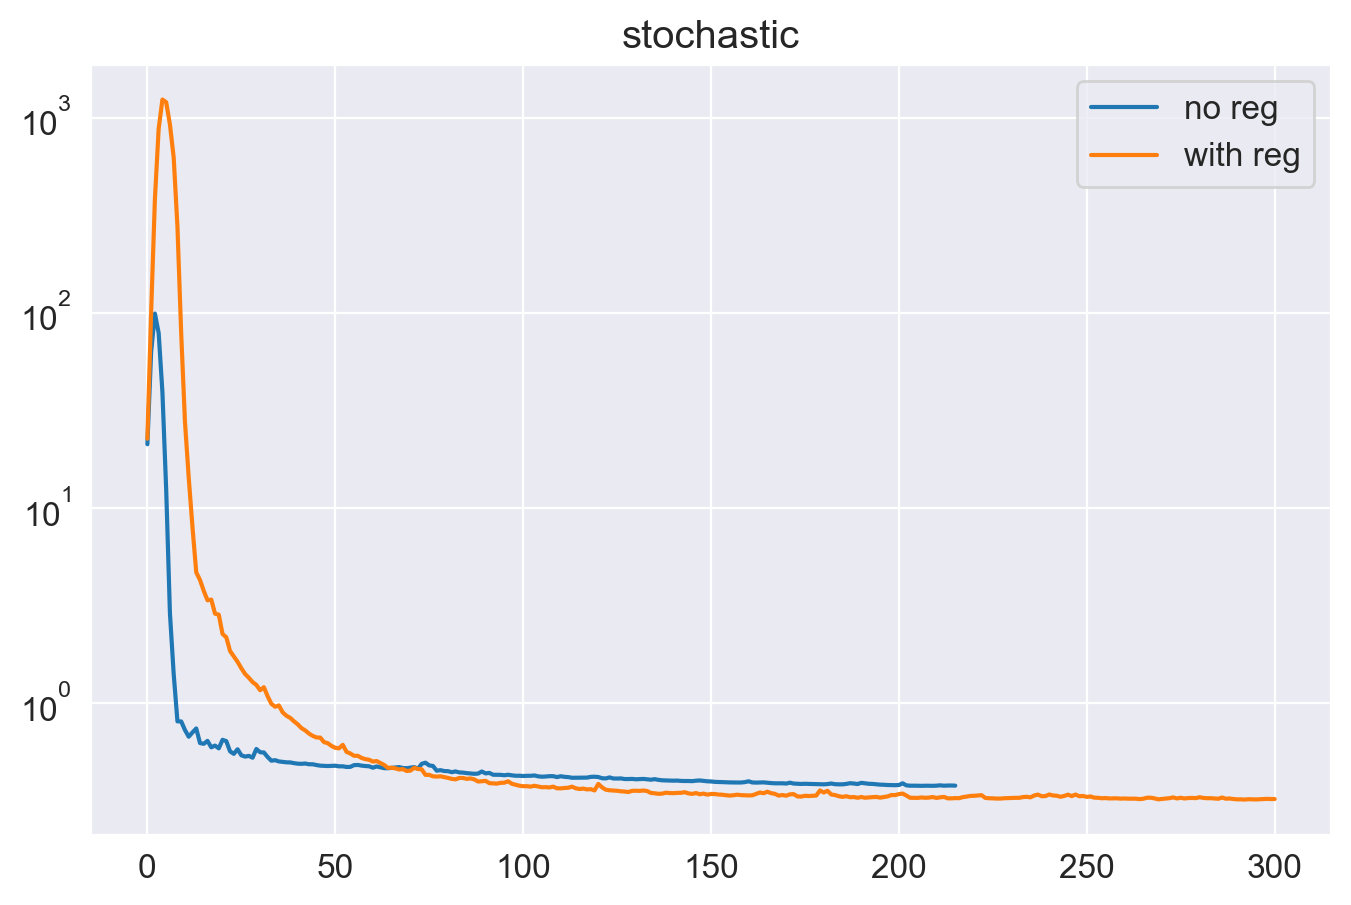

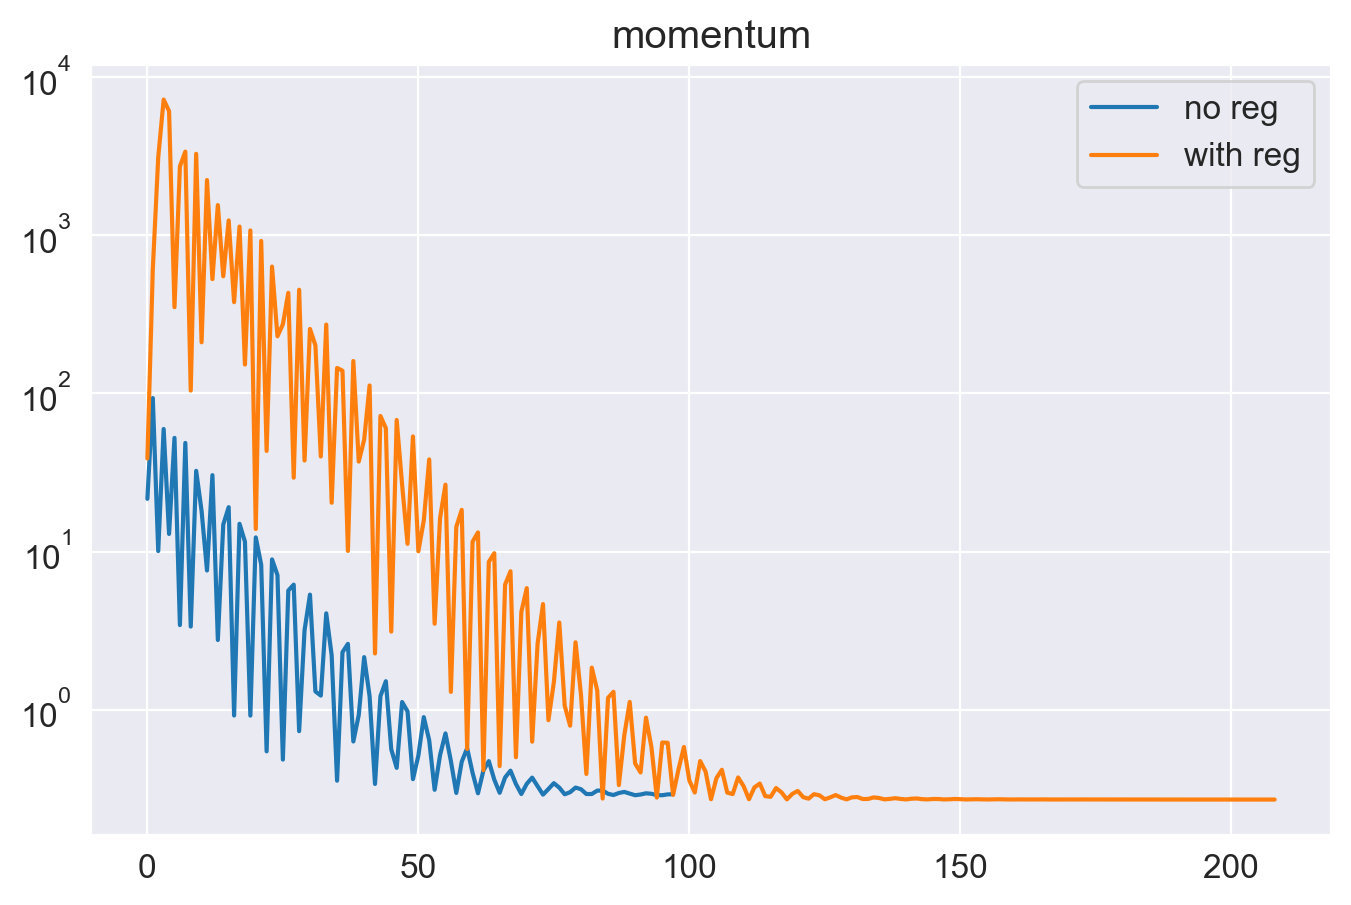

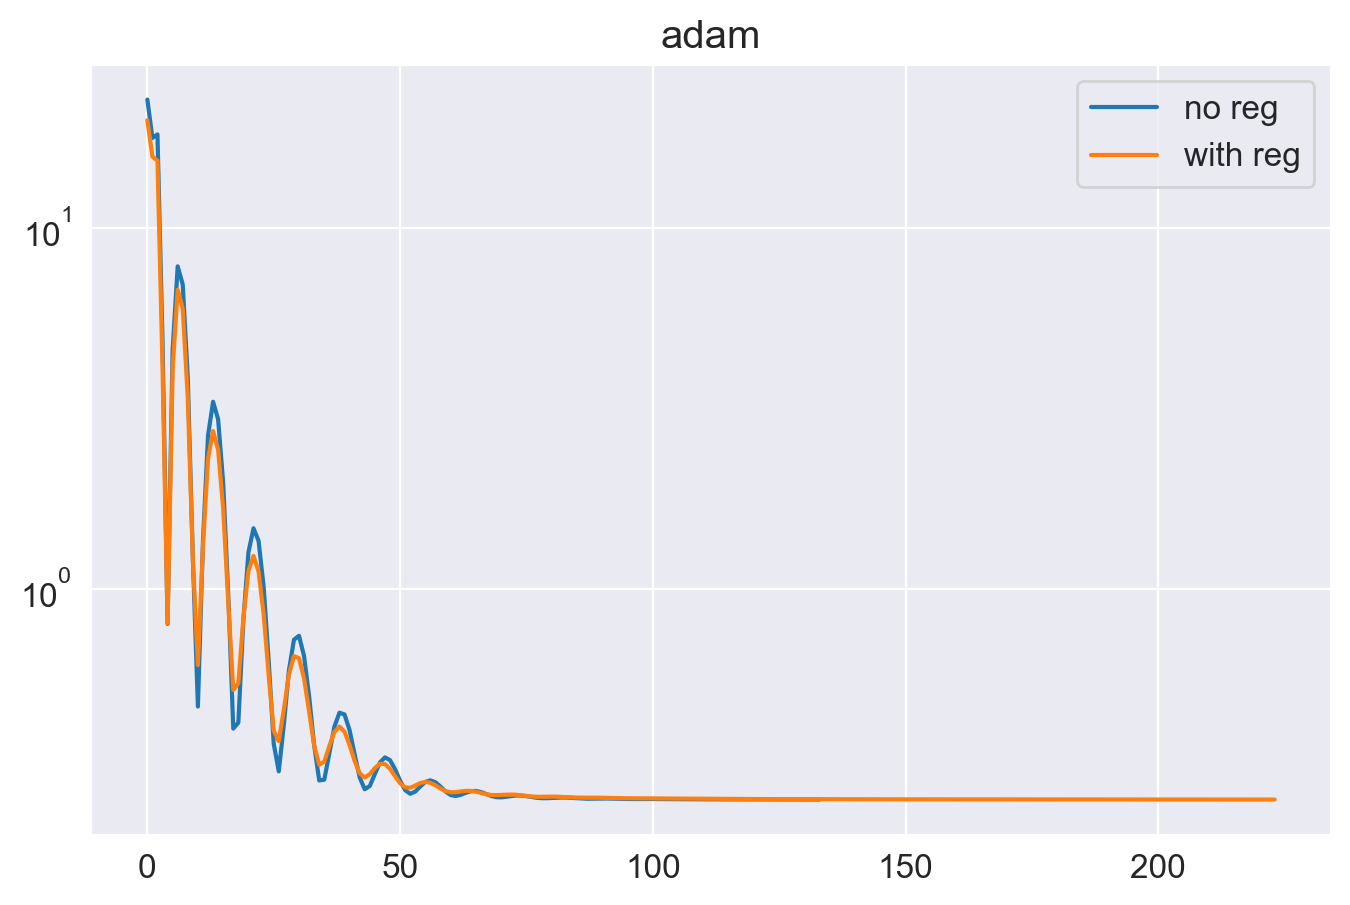

In [47]:
for i in range(4):
    plt.title(last_configs[i]['descent_name'])
    plt.plot(range(len(mse_histories_first[i])), mse_histories_first[i], label='no reg')
    plt.plot(range(len(mse_histories_second[i])), mse_histories_second[i], label='with reg')
    plt.yscale('log')
    plt.legend()
    plt.show()

Везде кроме SGD финальные метрики и лосс лучше, но при этом сходимость стала чуть хуже. Скорее всего это из-за того, что с регуляризацией модели сложнее подстроиться под выборку и она обучается чуть дольше. Но зато виден небольшой эффект улучшения качества, причем как на трейне(немного странно, может из-за изменения длины шага), так и на тесте, так как модель с регуляризацией должна обладать лучшей обобщающей способностью

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:

Возьмем частные производные для каждого $w_i$:
$\frac{dw}{dL} = \frac{dw}{dXw} \cdot sinh(Xw - y) \cdot \frac{1}{cosh(Xw - y)} = \frac{dw}{dXw} \cdot tanh(Xw - y) = X^T \cdot tanh(Xw - y)$

$\nabla_w LogCosh(w, X, y) = X^T \cdot tanh(Xw - y)$



При подсчете градиента будем нормировать на число объектов дабы избежать огромных значений градиента. Как и при подсчете лосса, чтобы повысить интерпретируемость ))

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [59]:
from sklearn.metrics import mean_squared_error
from descents import LossFunction

def log_cosh(y_true, y_pred):
    return np.average(np.log(np.cosh(y_pred - y_true)))

configs = [
    {
        'descent_name': 'full',
        'kwargs': {
            'dimension': X_train.shape[1],
            'loss_function': LossFunction.LogCosh,
        }
    },
    {
        'descent_name': 'stochastic',
        'kwargs': {
            'dimension': X_train.shape[1],
            'loss_function': LossFunction.LogCosh,
        }
    },
    {
        'descent_name': 'momentum',
        'kwargs': {
            'dimension': X_train.shape[1],
            'loss_function': LossFunction.LogCosh,
        }
    },
    {
        'descent_name': 'adam',
        'kwargs': {
            'dimension': X_train.shape[1],
            'loss_function': LossFunction.LogCosh,
        }
    }
]

np.random.seed(423)

lambdas = {
    'full': np.logspace(-1, 1.5, 30),
    'stochastic': np.logspace(-1, 1.5, 30),
    'momentum': np.logspace(-1, 1.5, 30),
    'adam': np.logspace(-1, 1.5, 30)
}

res = {
    'name': [],
    'lambda_': [],
    'log_cosh_loss': []
}

for conf in configs:
    for lambda_ in lambdas[conf['descent_name']]:
        conf['kwargs']['lambda_'] = lambda_
        regression = LinearRegression(
            descent_config=conf
        )

        regression.fit(X_train, y_train.values)
        y_pred_val = regression.predict(X_val)
        lo_loss = log_cosh(y_val, y_pred_val)

        res['name'].append(conf['descent_name'])
        res['lambda_'].append(lambda_)
        res['log_cosh_loss'].append(lo_loss)

Stopped by tolerance on step 86
Stopped by tolerance on step 63
Stopped by tolerance on step 74
Stopped by tolerance on step 45
Stopped by tolerance on step 47
Stopped by tolerance on step 40
Stopped by tolerance on step 37
Stopped by tolerance on step 36
Stopped by tolerance on step 35
Stopped by tolerance on step 43
Stopped by tolerance on step 35
Stopped by tolerance on step 44
Stopped by tolerance on step 41
Stopped by tolerance on step 44
Stopped by tolerance on step 47
Stopped by tolerance on step 51
Stopped by tolerance on step 64
Stopped by tolerance on step 72
Stopped by tolerance on step 80
Stopped by tolerance on step 94
Stopped by tolerance on step 120
Stopped by tolerance on step 170
Stopped by tolerance on step 247
Stopped by max iter on step 300
Stopped by max iter on step 300
Stopped by max iter on step 300
Stopped by max iter on step 300
Stopped by max iter on step 300
Stopped by max iter on step 300
Stopped by max iter on step 300
Stopped by tolerance on step 54
Stopp

In [60]:
res_df = pd.DataFrame(res).sort_values('log_cosh_loss').groupby('name').head(1)
res_df

,name,lambda_,log_cosh_loss
119,adam,31.622777,0.095710
83,momentum,9.610780,0.098031
50,stochastic,5.298317,0.111523
22,full,7.880463,0.113436


In [61]:
configs = [
    {
        'descent_name': 'full',
        'kwargs': {
            'dimension': X_train.shape[1],
            'lambda_': 7.88,
            'loss_function': LossFunction.LogCosh,
        }
    },
    {
        'descent_name': 'stochastic',
        'kwargs': {
            'dimension': X_train.shape[1],
            'lambda_': 5.3,
            'loss_function': LossFunction.LogCosh,
        }
    },
    {
        'descent_name': 'momentum',
        'kwargs': {
            'dimension': X_train.shape[1],
            'lambda_': 9.61,
            'loss_function': LossFunction.LogCosh,
        }
    },
    {
        'descent_name': 'adam',
        'kwargs': {
            'dimension': X_train.shape[1],
            'lambda_': 31.62,
            'loss_function': LossFunction.LogCosh,
        }
    }
]

In [62]:
from sklearn.metrics import r2_score

metrics = []

for i, conf in enumerate(configs):
    regression = LinearRegression(
        descent_config=conf
    )
    regression.fit(X_train, y_train.values)
    y_pred = regression.predict(X_test)
    cur_reg = {
        'name': conf['descent_name'],
        'R^2': r2_score(y_true=y_test, y_pred=y_pred),
        'test_mse': mean_squared_error(y_true=y_test, y_pred=y_pred),
        'train_mse': mean_squared_error(y_true=y_train, y_pred=regression.predict(X_train)),
        'steps_before_stop': len(regression.loss_history) - 1  # -1 тк финальный лосс не делает шаг
    }
    metrics.append(cur_reg)

Stopped by tolerance on step 247
Stopped by max iter on step 300
Stopped by max iter on step 300
Stopped by tolerance on step 203


In [63]:
log_cosh_metrics = pd.DataFrame(metrics)
log_cosh_metrics['regularized'] = False
log_cosh_metrics['log_cosh'] = True
first_metrics['log_cosh'] = False

pd.concat([first_metrics, log_cosh_metrics]).sort_values('R^2', ascending=False)

,name,R^2,test_mse,train_mse,steps_before_stop,regularized,log_cosh
3,adam,0.806328,0.239543,0.261376,204,False,True
3,adam,0.805898,0.240075,0.261445,133,False,False
2,momentum,0.782589,0.268905,0.292238,97,False,False
0,full,0.773522,0.280119,0.300976,248,False,True
1,stochastic,0.770416,0.283961,0.306849,300,False,True
0,full,0.759061,0.298005,0.319737,94,False,False
1,stochastic,0.712946,0.355043,0.377574,215,False,False
2,momentum,-0.507430,1.864465,1.901503,300,False,True


Как мы видим, лог-кош дает чуть лучшие результаты (кроме momentum, где он решил разойтись)) относительно R^2. Скорее всего, так как этот лосс более лоялен к выбросам

### Кулинарно-социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, время пробовать новое и делиться теплом с друзьями и близкими. Выберите рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека им. Кратко опишите ваши впечатления, прикрепите рецепт и фотографии блюда и довольного гостя.

### Лакшерный ужин бедного студента ###
Как известно, студенты не самые богатые люди, поэтому я предпочел рассказать о том, как вкусно покушать не очень богатому человеку, но при этом все равно ощущать себя довольно таки элитным.
1) Идем в ближайший магазин и покупаем все необходимое. А именно, лакшери-бич-пакет доширак чан жан мён. Ориентировочно, данный ингридиент стоит в районе 110-130 рублей, что по меркам бич-пакетов ого-го.
2) Возвращаемся домой с сием чудом и ставим воду на плиту. Я использовал около полулитра (3 обычных стакана воды). Ждем, пока вода закипит.
3) Открываем пакет, достаем макароны и соус. Макароны кидаем в кипящую воду и варим ровно 5 минут. **Важно:** как я недавно узнал из другого, менее элитного бич-пакета чан-рамен, макароны надо помешивать, немного доставая их из воды, чтобы они насыщались кислородом. Действительно, получается еще вкуснее!
4) По истечении 5 минут сливаем почти всю воду, оставив ее буквально на донышке, для сочности.
5) Добавляем соус из пакета, тщательно перемешиваем.
6) Блюдо готово, его можно подавать!
Зовем гостя пробовать данный кулинарный изыск


### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

In [53]:
# YOUR CODE:

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [47]:
# YOUR CODE: